In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import missingno as msno  #https://pypi.org/project/missingno/

import seaborn as sns

from sklearn.preprocessing  import MinMaxScaler, StandardScaler

## **🔸 Hello Data**

### Load dataset

In [2]:
notebook_path = os.getcwd()
# Datasets path
# auto
csv_insurance_path = f"{notebook_path}/data/insurance.csv"

In [3]:
df=pd.read_csv(csv_insurance_path)
# df.head()
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.size

9366

In [6]:
df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

### Access to rows and columns

In [7]:
df.iloc[0]

age              19.0
sex            female
bmi              27.9
children          0.0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object

In [8]:
df.iloc[1]

age               NaN
sex              male
bmi             33.77
children          1.0
smoker             no
region      southeast
charges     1725.5523
Name: 1, dtype: object

In [9]:
df.iloc[0,0]

19.0

In [10]:
df.iloc[0,-1]

16884.924

In [11]:
df.iloc[0:3]

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.9240
1,NaN,male,33.77,1.0,no,southeast,1725.5523
2,28.0,male,33.00,3.0,no,southeast,4449.4620


In [12]:
df.iloc[0:3,2:4]

,bmi,children
0,27.90,0.0
1,33.77,1.0
2,33.00,3.0


In [13]:
df.iloc[[0,2]]

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0.0,yes,southwest,16884.924
2,28.0,male,33.0,3.0,no,southeast,4449.462


In [14]:
df.iloc[[0,20]]

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
20,60.0,female,36.005,0.0,no,northeast,13228.84695


In [15]:
df.iloc[:,1]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [16]:
df.iloc[:,[1,5]]

,sex,region
0,female,southwest
1,male,southeast
2,male,southeast
3,male,northwest
4,male,northwest
...,...,...
1333,male,northwest
1334,female,northeast
1335,female,southeast
1336,female,southwest


In [17]:
df['children']

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

In [18]:
df[['children']]

,children
0,0.0
1,1.0
2,3.0
3,0.0
4,0.0
...,...
1333,3.0
1334,0.0
1335,0.0
1336,0.0


In [19]:
df[['children','age','sex']]

,children,age,sex
0,0.0,19.0,female
1,1.0,NaN,male
2,3.0,28.0,male
3,0.0,33.0,male
4,0.0,32.0,male
...,...,...,...
1333,3.0,50.0,male
1334,0.0,18.0,female
1335,0.0,NaN,female
1336,0.0,21.0,female


In [20]:
df.children

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

### Make a codable dataset

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
df.columns=['Sge', 'Sex', 'BMI', 'Children why', 'Smoker_bla_bla', 'Region', 'Charges']
# df.columns
# df.Children why
df

,Sge,Sex,BMI,Children why,Smoker_bla_bla,Region,Charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [23]:
df.columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df.children

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

### Examining categorical and numerical features

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [25]:
df[['sex','smoker','region']]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [26]:
df[['sex','smoker','region']]=df[['sex','smoker','region']].astype('category')
# df.info()
df.dtypes

age          float64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

## **🔸 Missing Values**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1318 non-null   float64 
 1   sex       1338 non-null   category
 2   bmi       1284 non-null   float64 
 3   children  1205 non-null   float64 
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 46.3 KB


In [28]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,True,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [29]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,True,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [30]:
df.isna().sum() 
# df.isnull().sum()

age          20
sex           0
bmi          54
children    133
smoker        0
region        0
charges       0
dtype: int64

<Axes: >

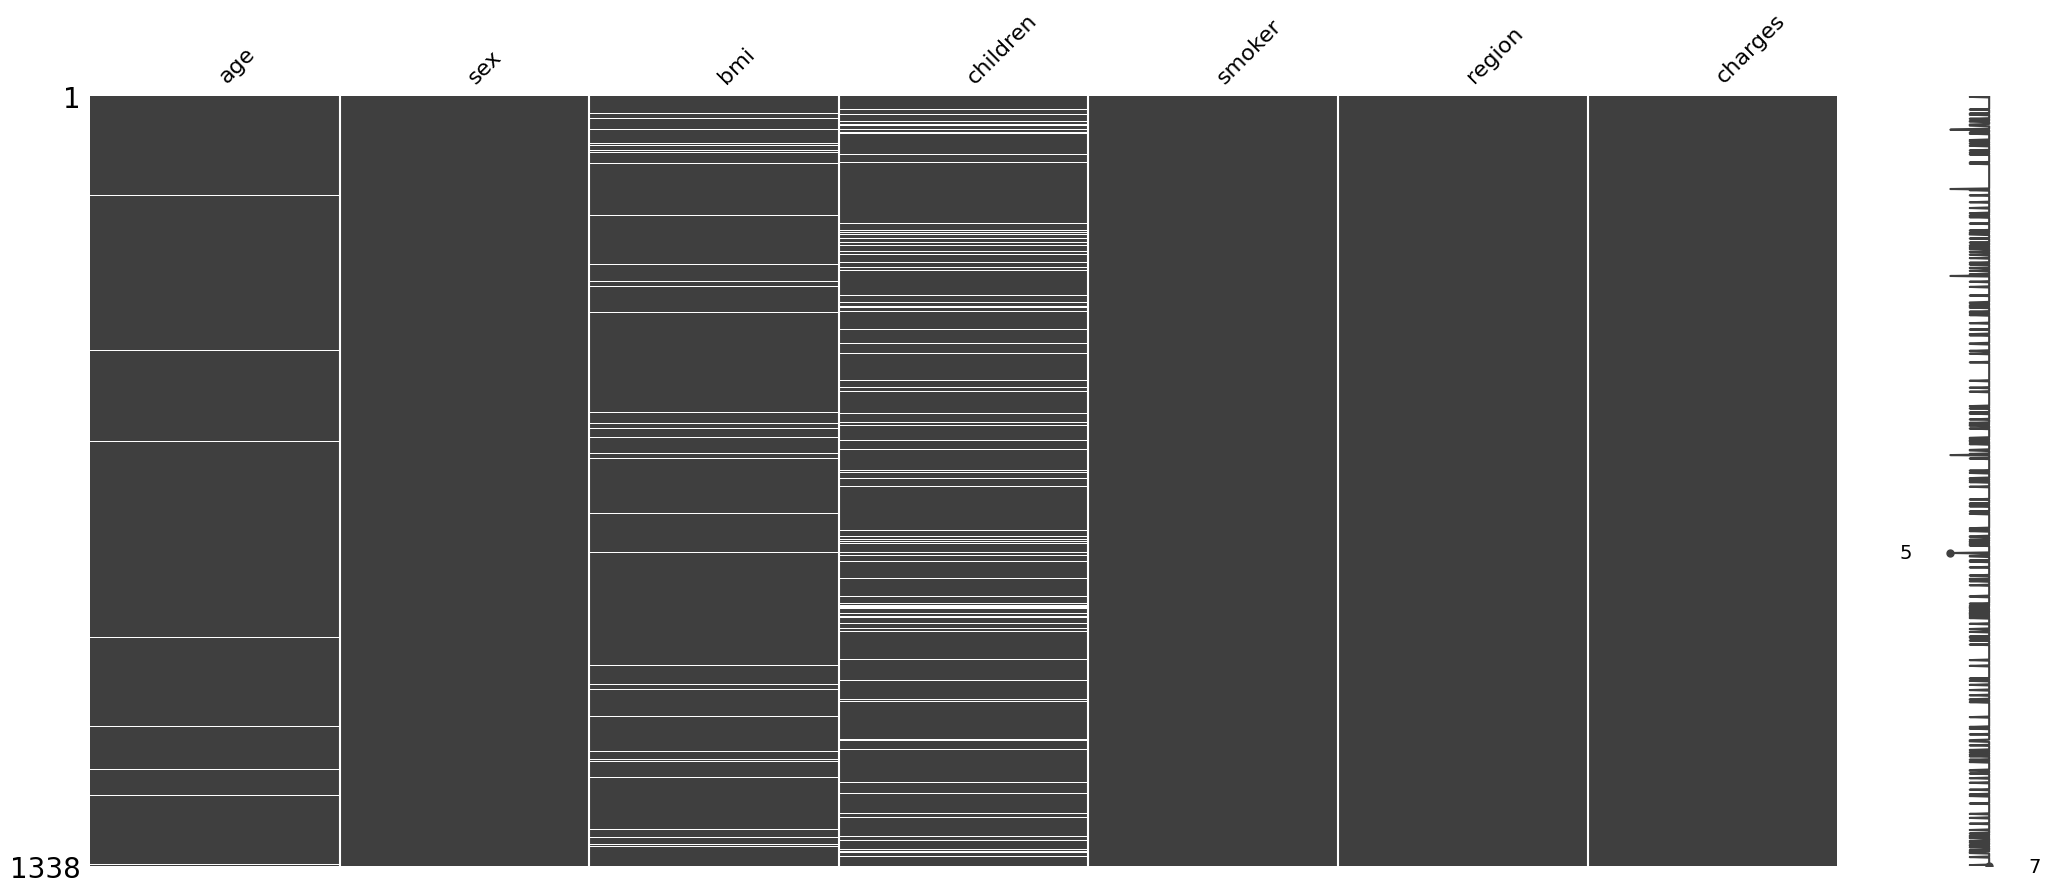

In [31]:
msno.matrix(df)

In [32]:
# msno.bar(df)
# msno.dendrogram(df)
# msno.heatmap(df)
# msno.nullity_filter(df)
# msno.nullity_sort(df)


### Diagnose missing values

#### * Children

children
False    1205
True      133
Name: count, dtype: int64


(array([180., 129.,  94., 114.,  97., 119., 128., 105., 117., 102.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

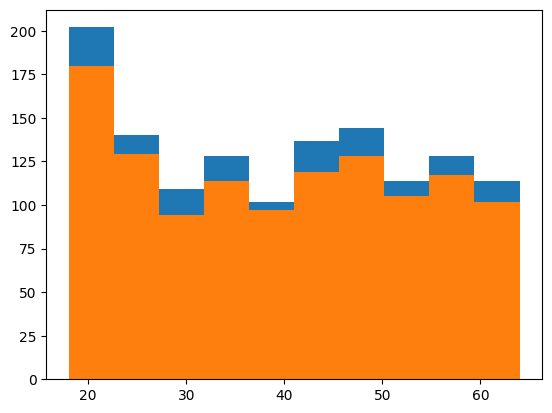

In [33]:
plt.hist(df.age)
flags=df.children.isna()
print(f"{flags.value_counts()}")
#plt.hist(df.age[flags])#all missing
plt.hist(df.age[~flags])

#### * BMI

children
False    1205
True      133
Name: count, dtype: int64


(array([ 28., 115., 202., 281., 244., 164.,  80.,  26.,  12.,   2.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

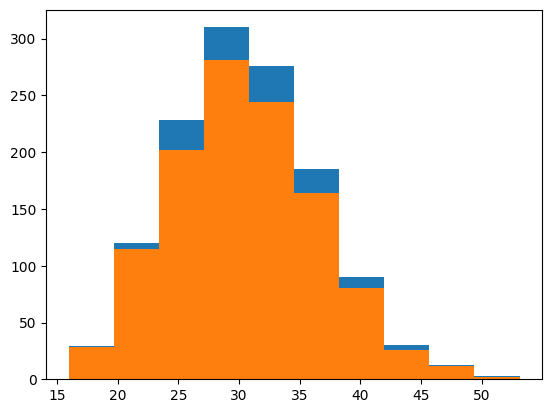

In [34]:
plt.hist(df.bmi)
flags=df.children.isna()
print(f"{flags.value_counts()}")
#plt.hist(df.bmi[flags])#all missing
plt.hist(df.bmi[~flags])

##### ** Function

In [35]:
def diagnose_mv(df, mv_column):
    cols = df.columns
    flags = df[mv_column].isna()
    fig, ax = plt.subplots(len(cols), 3, 
                           figsize=(len(cols)+3, len(cols)+3), 
                           constrained_layout=True)
    plt.rcParams['axes.grid'] = True
    for i, col in enumerate(cols):
        n1, bins, _ = ax[i, 0].hist(df[col])
        ax[i, 0].set_title(f'{col} with MV')
        #
        n2, _, _ = ax[i, 1].hist(df[col][~flags], bins=bins)
        ax[i, 1].set_title(f'{col} without MV')
        #
        if col == 'charges':
            bins/= 1e4 
        ax[i, 2].bar(bins[:-1], np.abs(n2-n1))
        ax[i, 2].set_title(f'Difference')
        

#### * Children

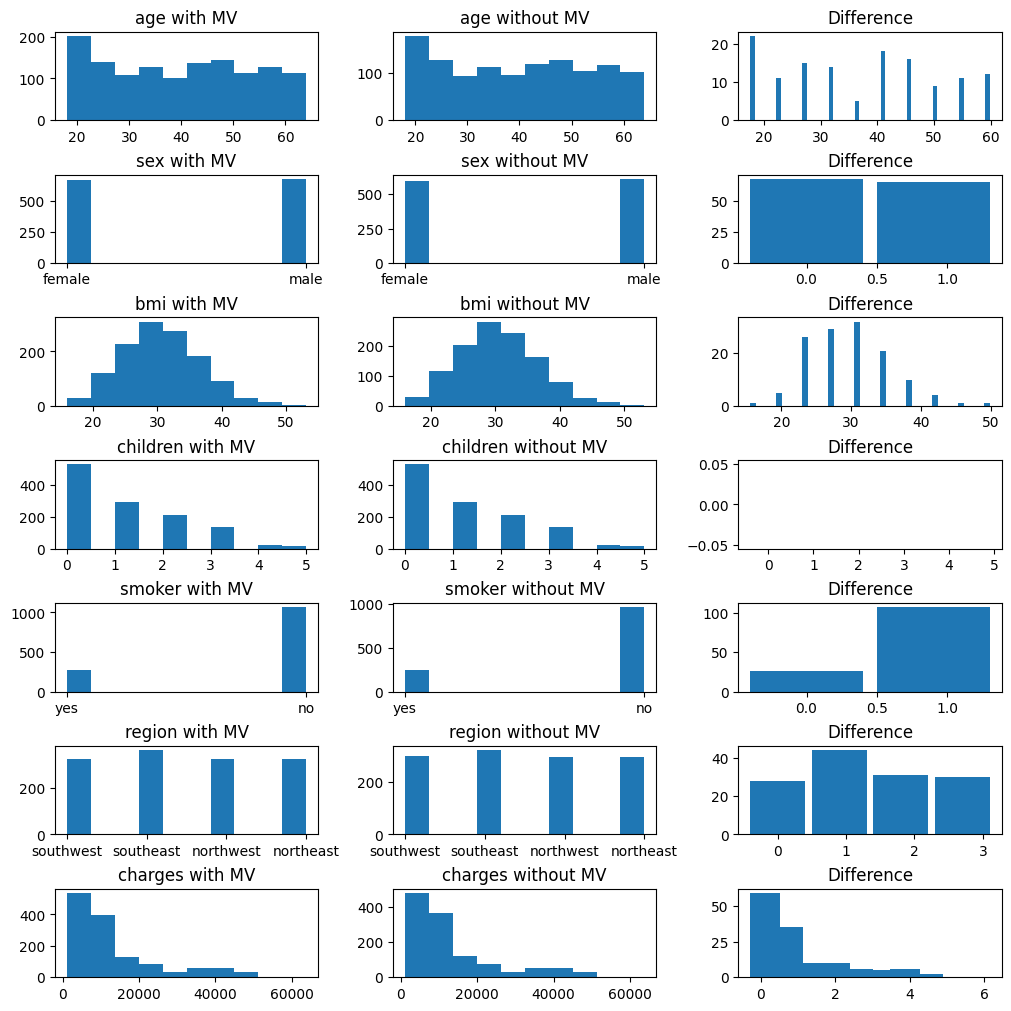

In [36]:
diagnose_mv(df,"children")

#### * BMI

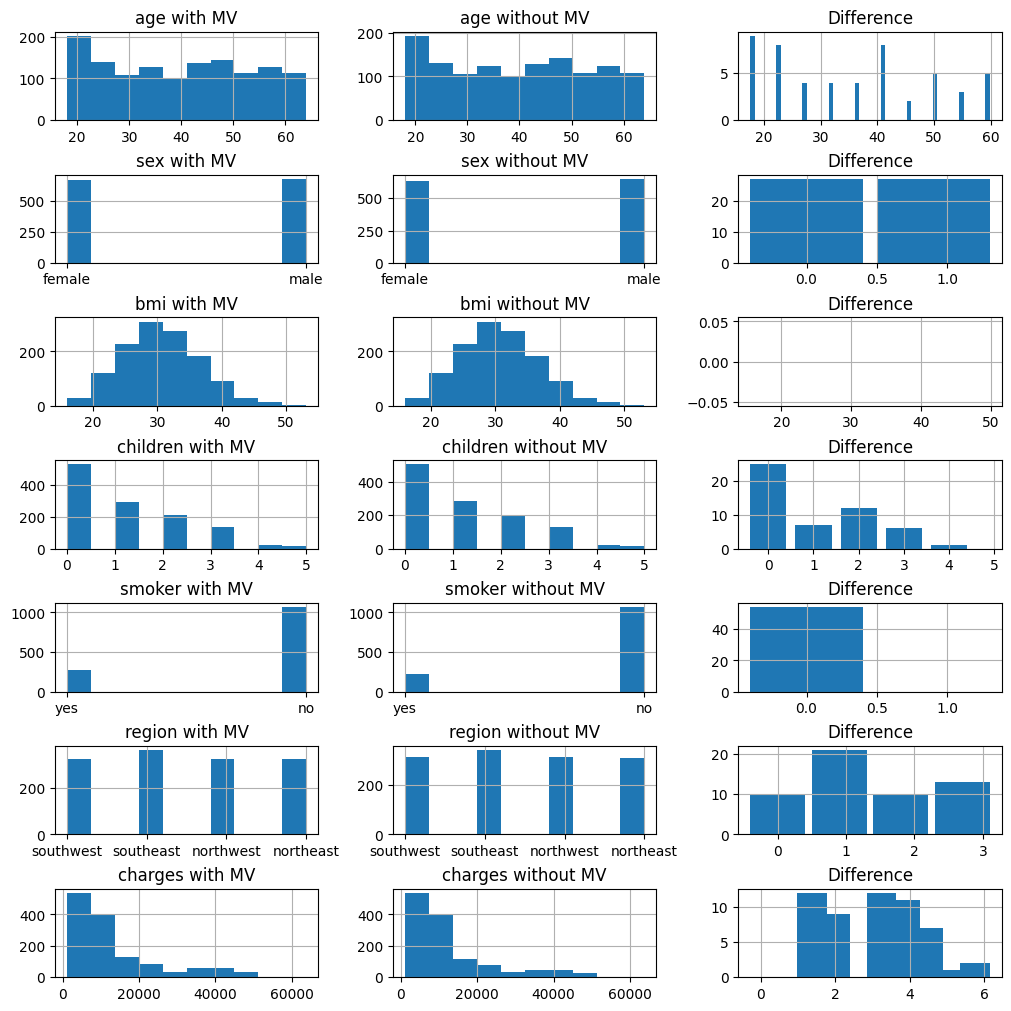

In [37]:
diagnose_mv(df,"bmi")

#### * Age

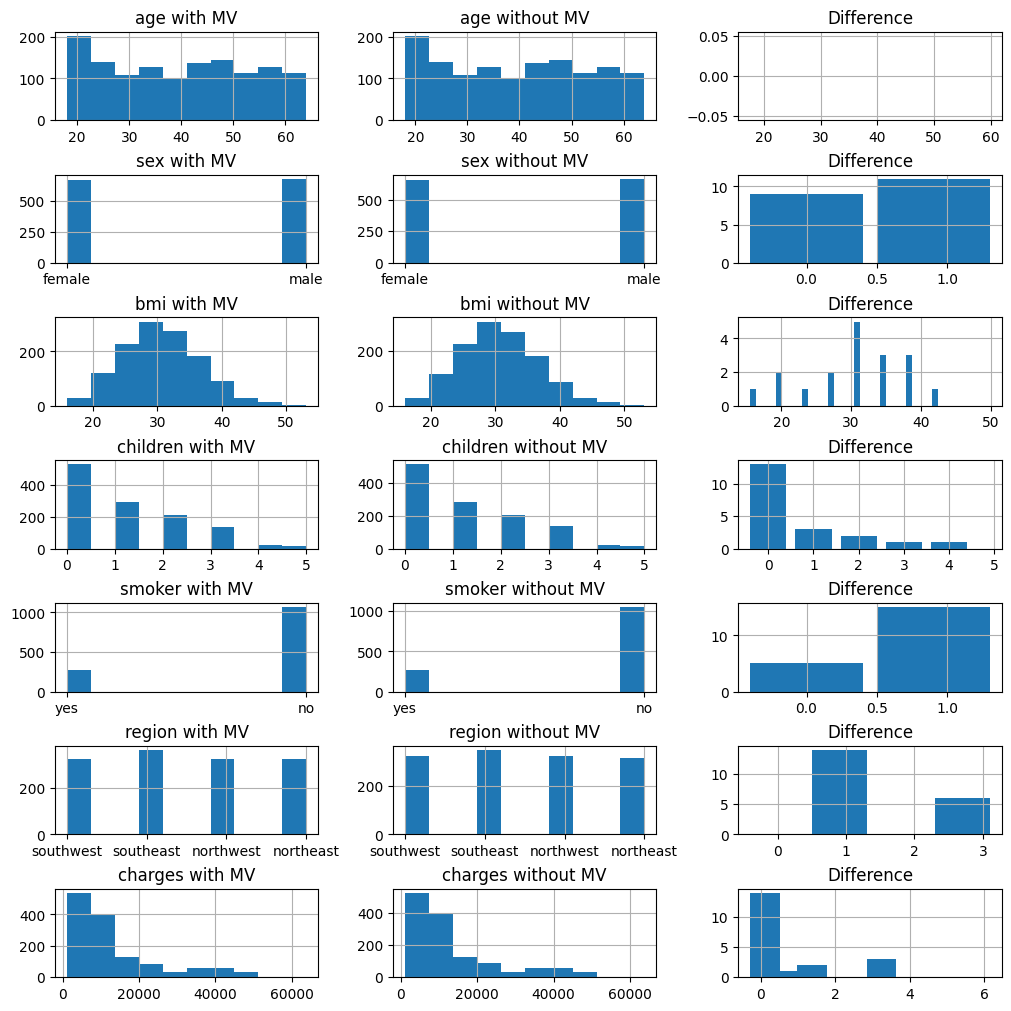

In [38]:
diagnose_mv(df,"age")

### Handling missing values

<Axes: >

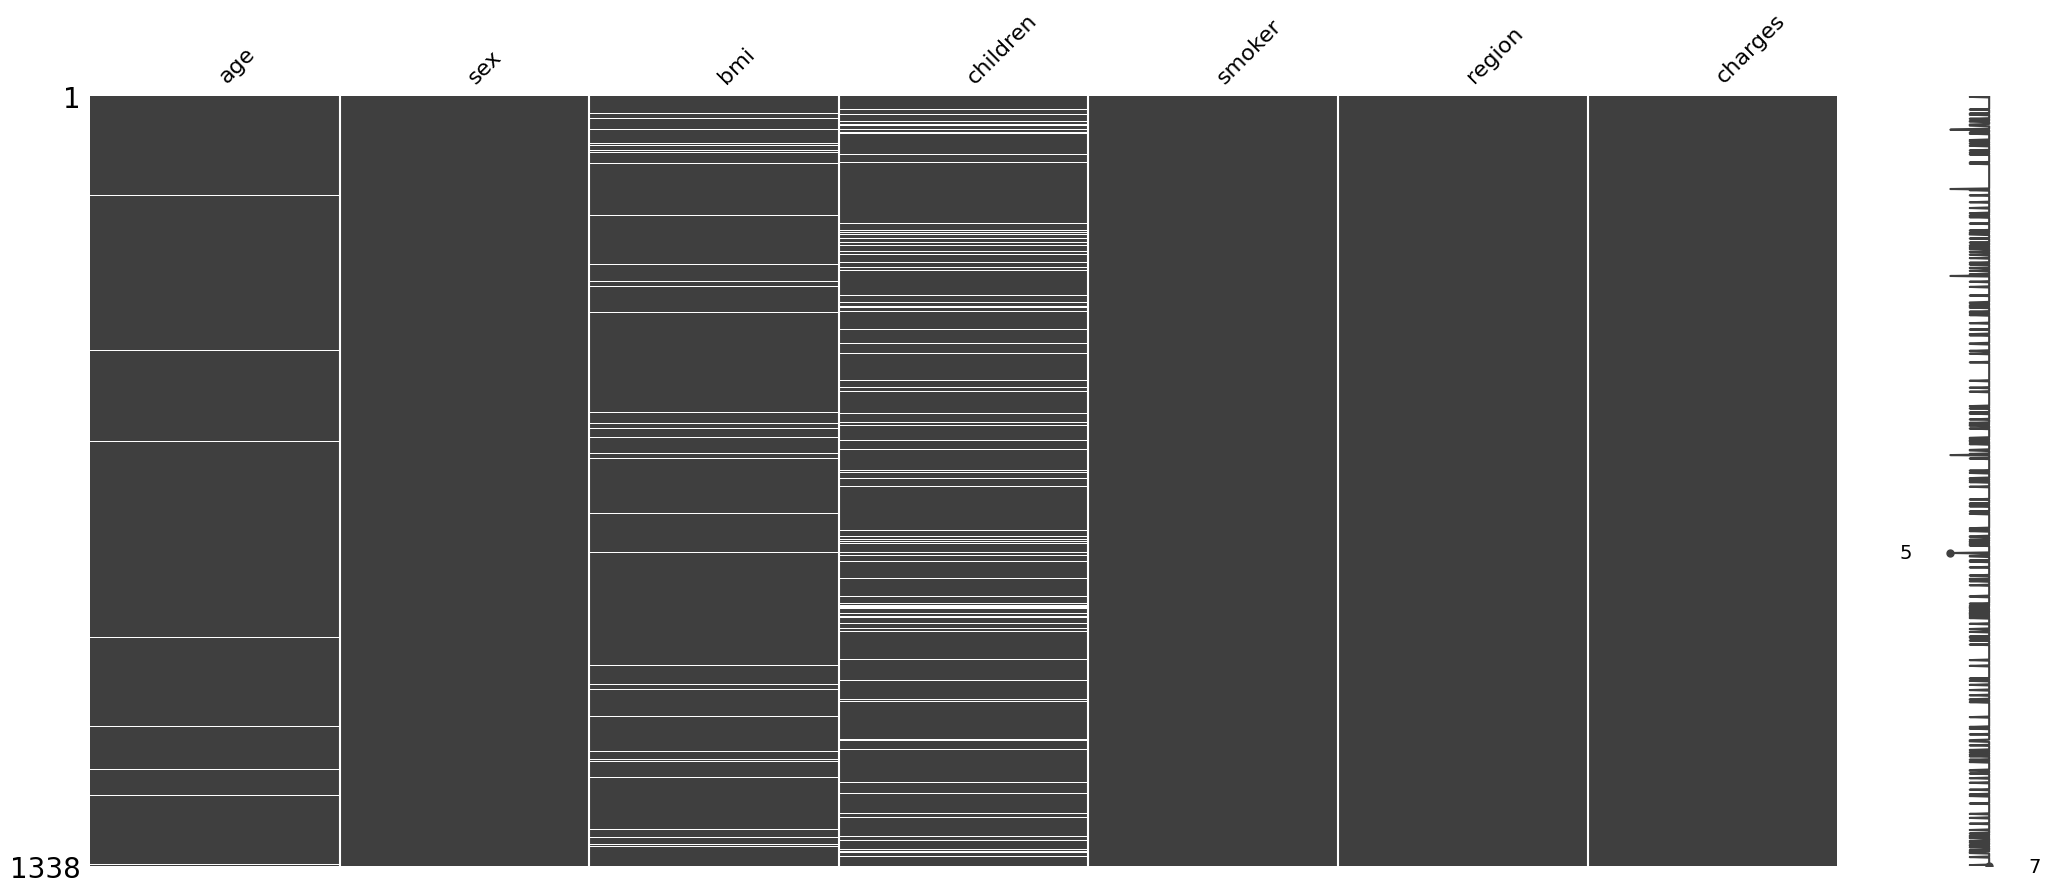

In [39]:
msno.matrix(df)

#### * Children

In [40]:
df.children.mode()
# df.children.mode().values

0    0.0
Name: children, dtype: float64

0


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\2528598159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.children.fillna(m, inplace=True)


<Axes: >

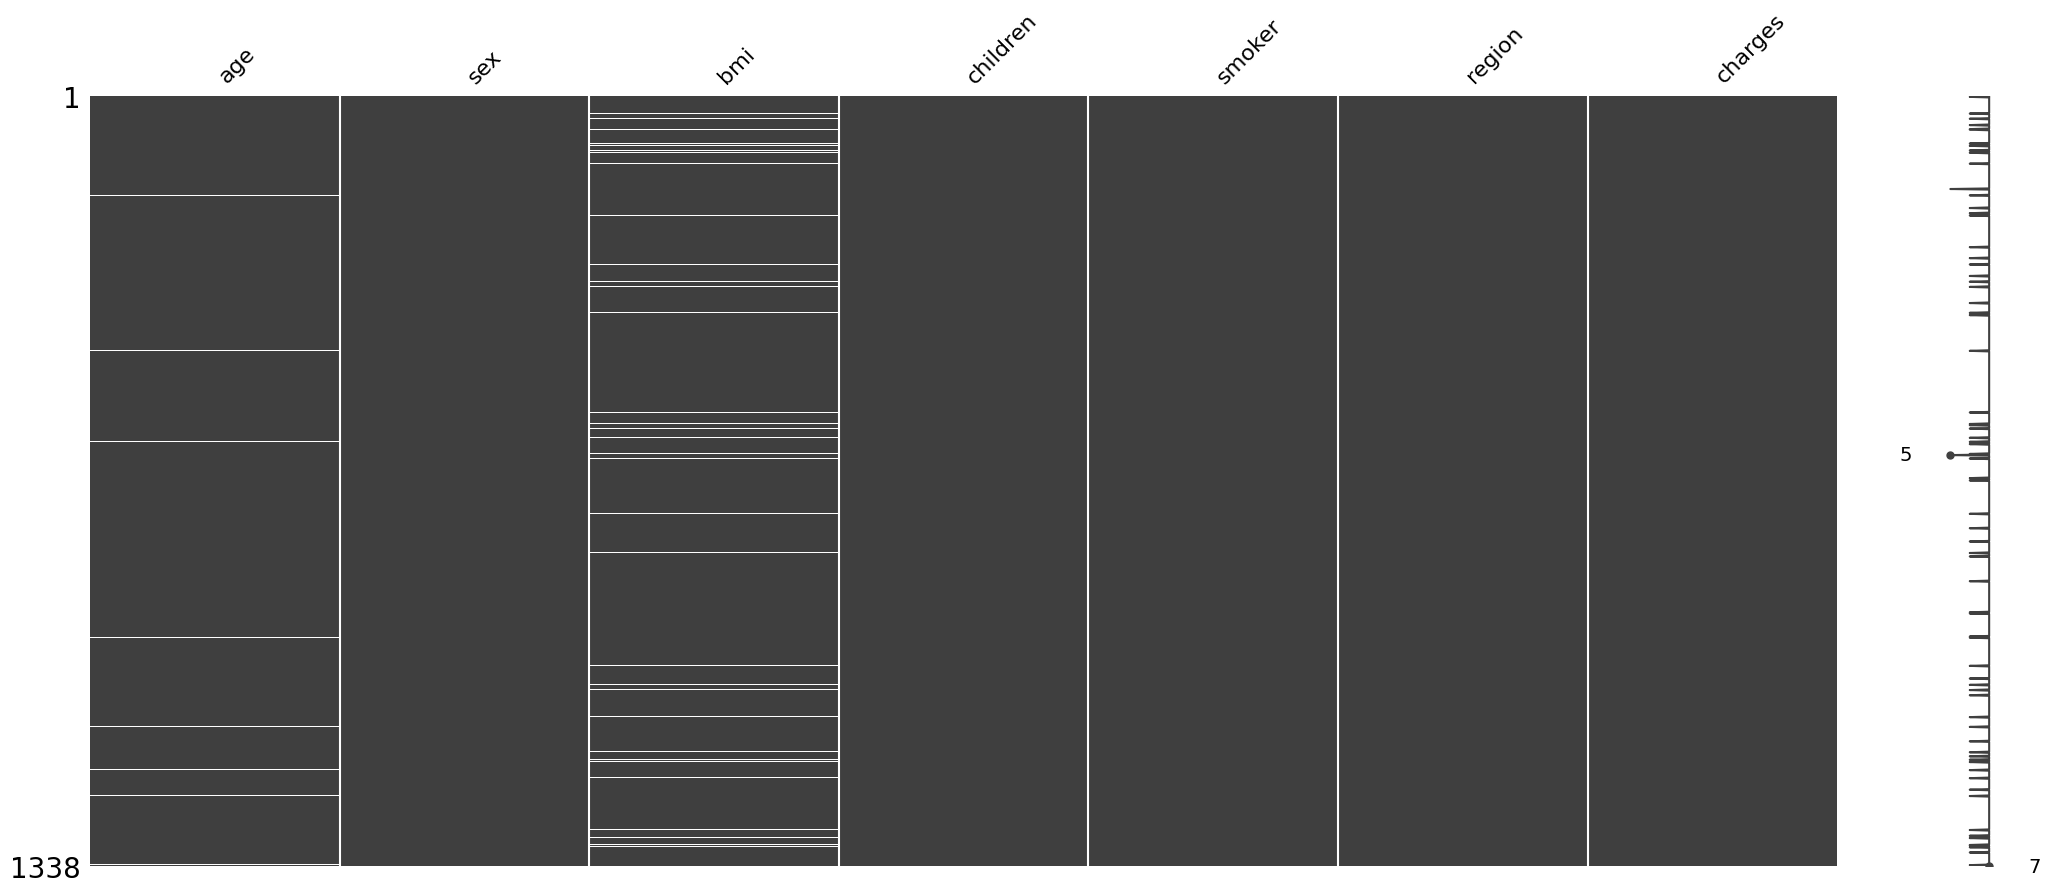

In [41]:
m = df.children.mode()[0]
# df.children = df.children.fillna(m, inplace=False)
df.children.fillna(m, inplace=True)
print(df.children.isna().sum())
msno.matrix(df)

#### * BMI

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\4189022600.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bmi.fillna(m, inplace=True)


<Axes: >

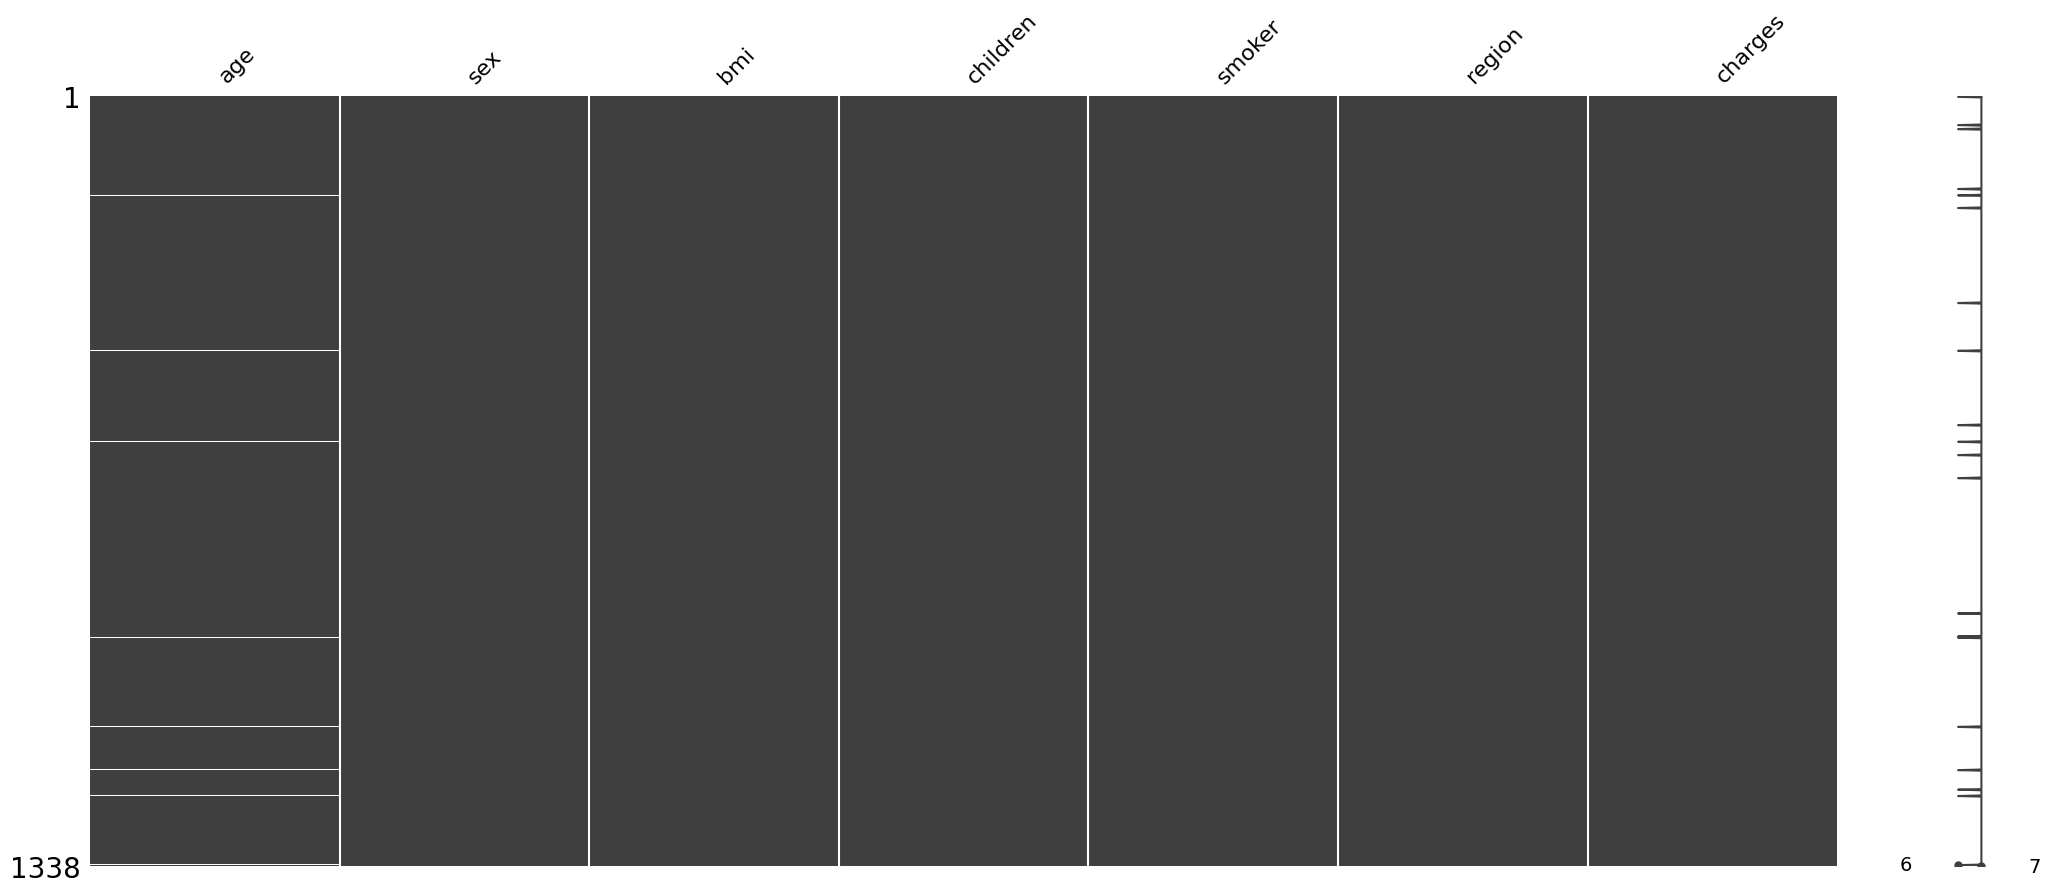

In [42]:
flags = df.smoker == 'yes'
m = df.bmi[flags].median()
df.bmi.fillna(m, inplace=True)
msno.matrix(df)

#### * Age

<Axes: >

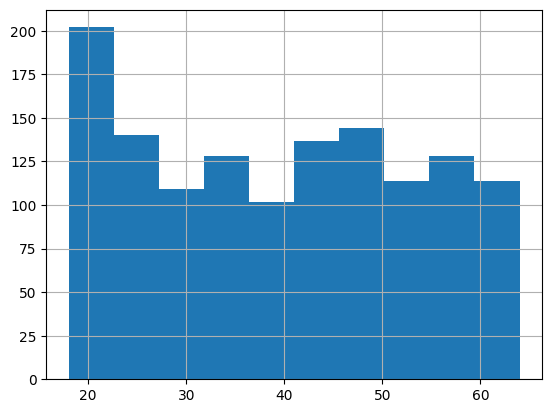

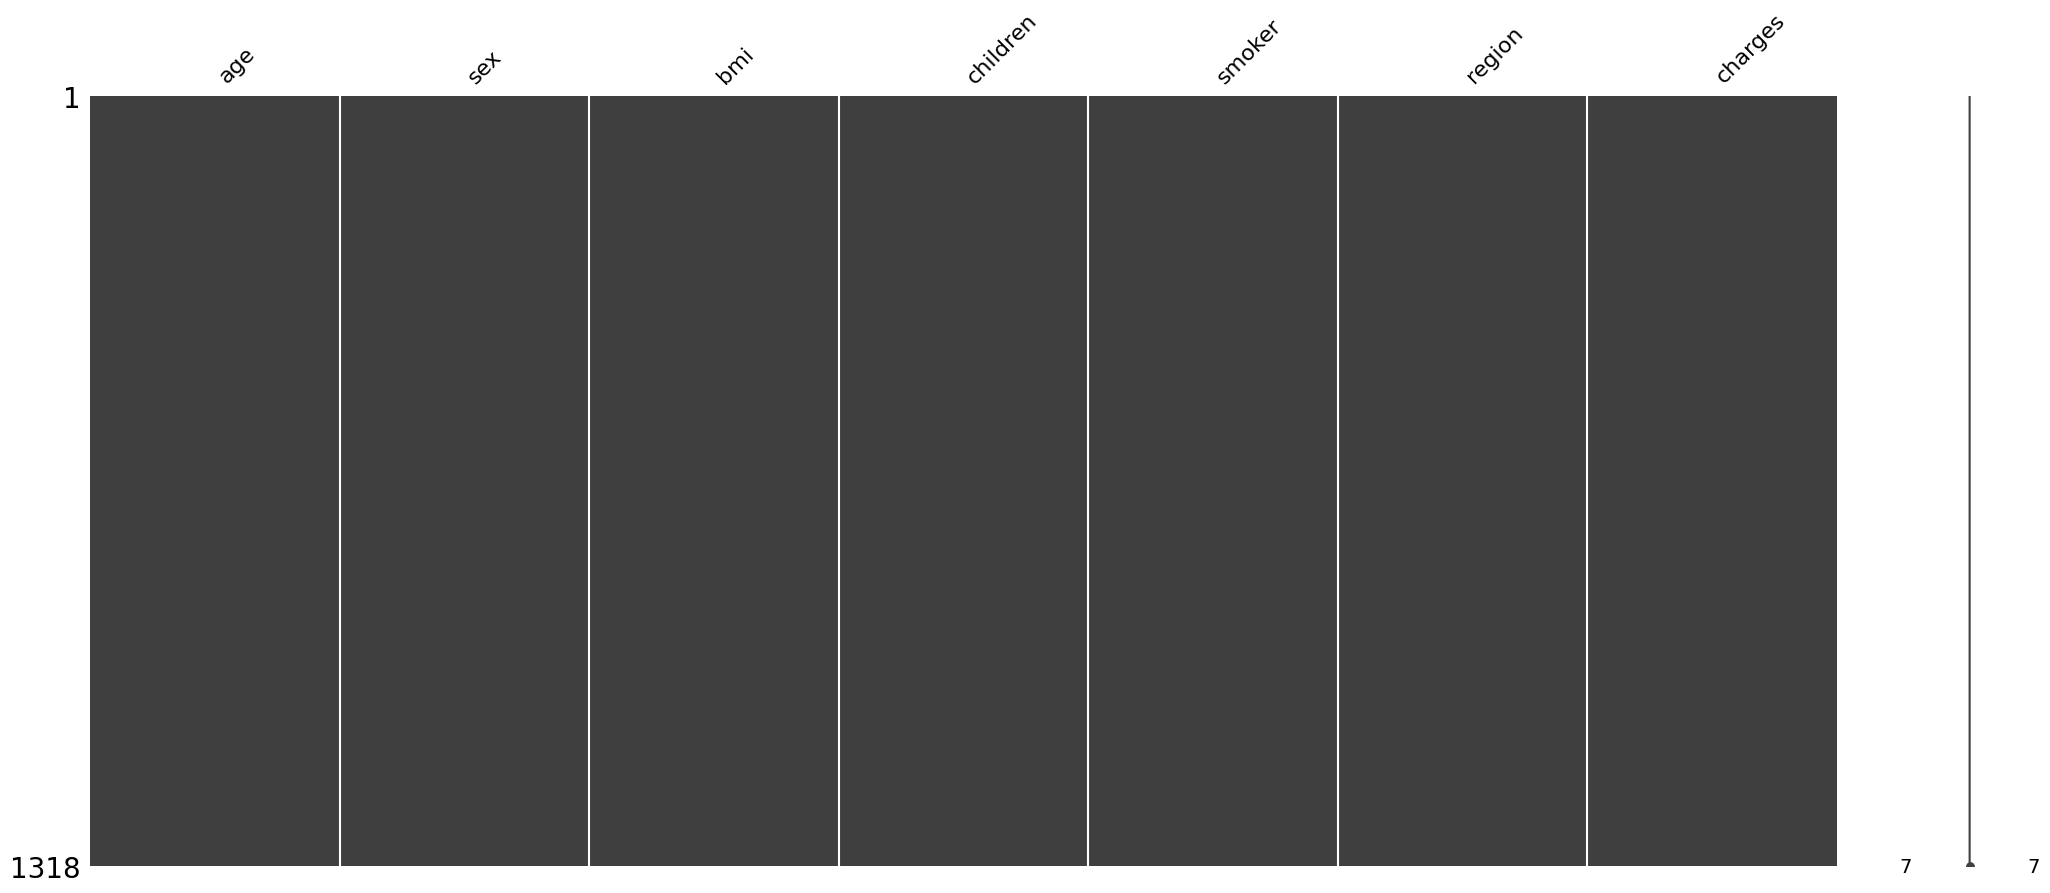

In [43]:
plt.hist(df.age)
flags = df.age.isna()
df.dropna(subset='age', inplace=True)
msno.matrix(df)

## **🔸 Encoding Categorical Features**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1318 non-null   float64 
 1   sex       1318 non-null   category
 2   bmi       1318 non-null   float64 
 3   children  1318 non-null   float64 
 4   smoker    1318 non-null   category
 5   region    1318 non-null   category
 6   charges   1318 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 55.8 KB


In [45]:
df.select_dtypes(include='float64')

,age,bmi,children,charges
0,19.0,27.900,0.0,16884.92400
2,28.0,33.000,3.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520
5,31.0,25.740,0.0,3756.62160
...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500
1333,50.0,30.970,3.0,10600.54830
1334,18.0,31.920,0.0,2205.98080
1336,21.0,25.800,0.0,2007.94500


In [46]:
pd.get_dummies(df)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,True,False,False,True,False,False,False,True
2,28.0,33.000,3.0,4449.46200,False,True,True,False,False,False,True,False
3,33.0,22.705,0.0,21984.47061,False,True,True,False,False,True,False,False
4,32.0,28.880,0.0,3866.85520,False,True,True,False,False,True,False,False
5,31.0,25.740,0.0,3756.62160,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500,True,False,True,False,False,False,False,True
1333,50.0,30.970,3.0,10600.54830,False,True,True,False,False,True,False,False
1334,18.0,31.920,0.0,2205.98080,True,False,True,False,True,False,False,False
1336,21.0,25.800,0.0,2007.94500,True,False,True,False,False,False,False,True


In [47]:
# pd.get_dummies(df, dtype=np.int32)
pd.get_dummies(df, dtype=np.float64)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.0,3756.62160,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
pd.get_dummies(df, drop_first=True, dtype=np.float64)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.0,3756.62160,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500,0.0,0.0,0.0,0.0,1.0
1333,50.0,30.970,3.0,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,0.0,0.0,0.0,0.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,0.0,1.0


### Label encoding

In [49]:
dfe = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True, dtype=np.float64)
dfe

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19.0,27.900,0.0,southwest,16884.92400,0.0,1.0
2,28.0,33.000,3.0,southeast,4449.46200,1.0,0.0
3,33.0,22.705,0.0,northwest,21984.47061,1.0,0.0
4,32.0,28.880,0.0,northwest,3866.85520,1.0,0.0
5,31.0,25.740,0.0,southeast,3756.62160,0.0,0.0
...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,southwest,11411.68500,0.0,0.0
1333,50.0,30.970,3.0,northwest,10600.54830,1.0,0.0
1334,18.0,31.920,0.0,northeast,2205.98080,0.0,0.0
1336,21.0,25.800,0.0,southwest,2007.94500,0.0,0.0


### One-hot encoding

In [50]:
dfe = pd.get_dummies(dfe, columns=['region'], dtype=np.float64)
dfe

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0
5,31.0,25.740,0.0,3756.62160,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,11411.68500,0.0,0.0,0.0,0.0,0.0,1.0
1333,50.0,30.970,3.0,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,0.0,0.0,1.0,0.0,0.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
print(dfe.columns)
dfe = dfe[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges']]
dfe

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')


,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
2,28.0,33.000,3.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33.0,22.705,0.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32.0,28.880,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520
5,31.0,25.740,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3756.62160
...,...,...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,0.0,0.0,0.0,0.0,0.0,1.0,11411.68500
1333,50.0,30.970,3.0,1.0,0.0,0.0,1.0,0.0,0.0,10600.54830
1334,18.0,31.920,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2205.98080
1336,21.0,25.800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.94500


### Scikit-learn

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

dfc = df.copy()

for col in dfc.select_dtypes(include='category').columns:
    dfc[col] = label_encoder.fit_transform(dfc[col])
    print(label_encoder.classes_)
dfc

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
5,31.0,0,25.740,0.0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52.0,0,44.700,3.0,0,3,11411.68500
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1336,21.0,0,25.800,0.0,0,3,2007.94500


In [53]:
dfc.rename(columns={'sex':'sex_male', 'smoker':'smoker_yes'}, inplace=True)
dfc

,age,sex_male,bmi,children,smoker_yes,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
5,31.0,0,25.740,0.0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52.0,0,44.700,3.0,0,3,11411.68500
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1336,21.0,0,25.800,0.0,0,3,2007.94500


## **🔸 Exploratory Data Analysis (EDA)**

### Single varaible analysis

#### * Central tendency

In [54]:
# df.mean()
#It returns error

In [55]:
df.mean(numeric_only=True)

age            39.528832
bmi            30.589632
children        0.972686
charges     13335.884744
dtype: float64

In [56]:
dfe.mean()

age                    39.528832
bmi                    30.589632
children                0.972686
sex_male                0.504552
smoker_yes              0.204097
region_northeast        0.241275
region_northwest        0.246586
region_southeast        0.265554
region_southwest        0.246586
charges             13335.884744
dtype: float64

In [57]:
dfe.median()

age                   40.00000
bmi                   30.11000
children               1.00000
sex_male               1.00000
smoker_yes             0.00000
region_northeast       0.00000
region_northwest       0.00000
region_southeast       0.00000
region_southwest       0.00000
charges             9423.92265
dtype: float64

In [58]:
dfe.mode()  

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19.0,30.11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1639.5631


#### * Variability

In [59]:
dfe.std()

age                    13.909197
bmi                     5.922928
children                1.187449
sex_male                0.500169
smoker_yes              0.403193
region_northeast        0.428019
region_northwest        0.431187
region_southeast        0.441795
region_southwest        0.431187
charges             12098.305244
dtype: float64

In [60]:
dfe.var()

age                 1.934658e+02
bmi                 3.508108e+01
children            1.410035e+00
sex_male            2.501691e-01
smoker_yes          1.625648e-01
region_northeast    1.832002e-01
region_northwest    1.859223e-01
region_southeast    1.951831e-01
region_southwest    1.859223e-01
charges             1.463690e+08
dtype: float64

In [61]:
x=np.array([1,2,3,4,5,2,2,2])
np.mean(np.abs(x-np.mean(x)))

1.03125

In [62]:
def median_abs_dev(x):
    return (x-x.median()).abs().median()
median_abs_dev(dfe)

age                   12.00000
bmi                    3.98750
children               1.00000
sex_male               0.00000
smoker_yes             0.00000
region_northeast       0.00000
region_northwest       0.00000
region_southeast       0.00000
region_southwest       0.00000
charges             4986.33435
dtype: float64

In [63]:
median_abs_dev(dfe['age'])

12.0

In [64]:
dfe[['age']].apply(median_abs_dev)

age    12.0
dtype: float64

#### * Plots

(array([ 269.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1049.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

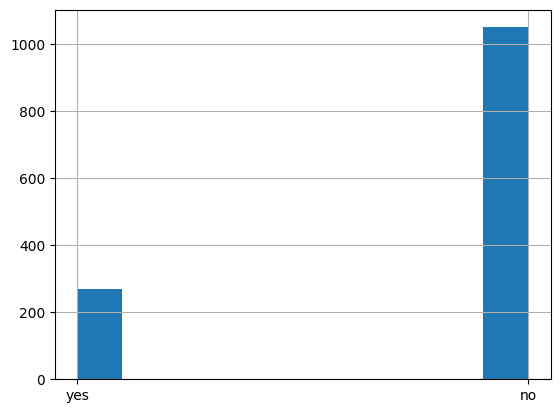

In [65]:
# plt.hist(dfe.age)
# plt.hist(df.sex)
plt.hist(df.smoker)

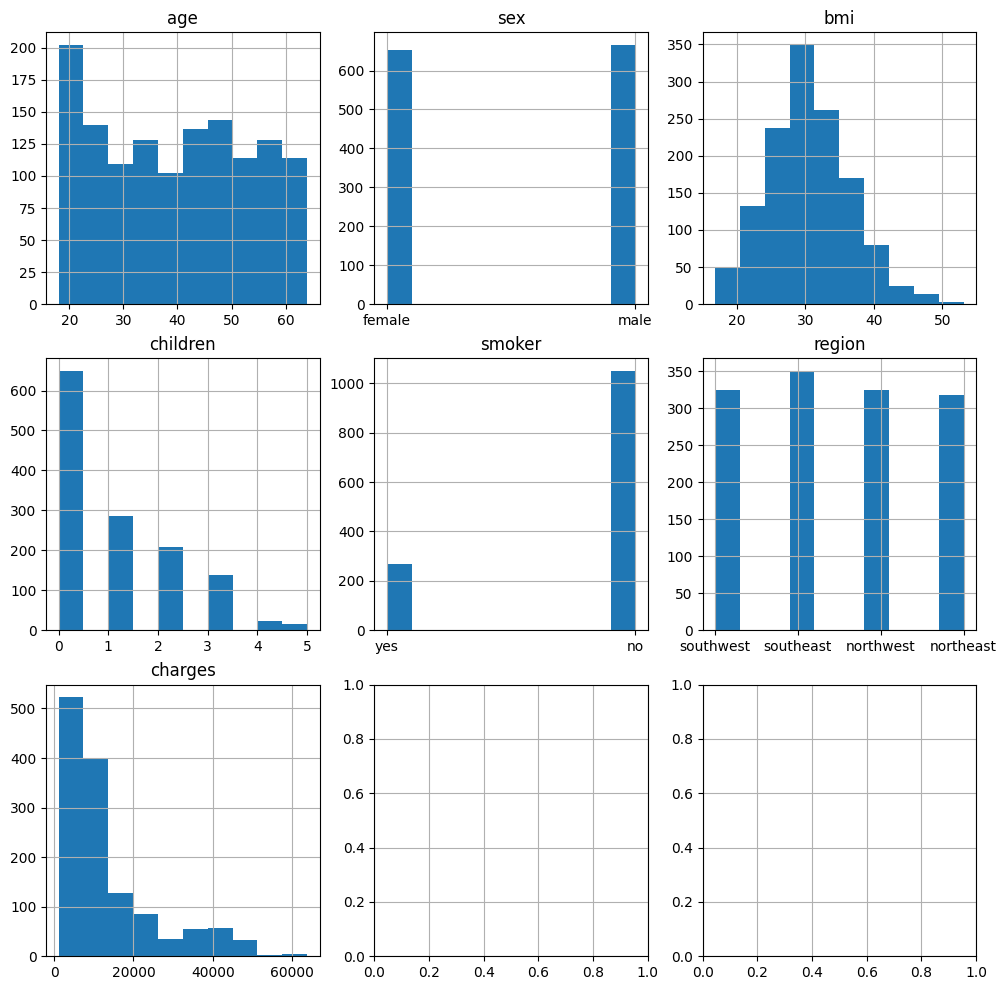

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.hist(df[col])
    ax.set_title(col)

,age,bmi,children,charges
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,39.528832,30.589632,0.972686,13335.884744
std,13.909197,5.922928,1.187449,12098.305244
min,18.000000,16.815000,0.000000,1131.506600
25%,27.000000,26.410000,0.000000,4828.586213
50%,40.000000,30.110000,1.000000,9423.922650
75%,51.000000,34.298750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


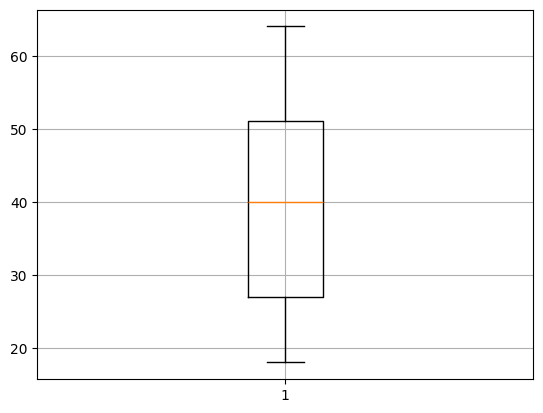

In [67]:
plt.boxplot(df.age)
df.describe()

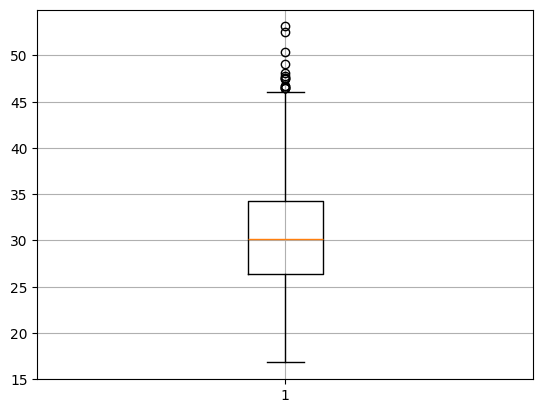

In [68]:
plt.boxplot(df.bmi);

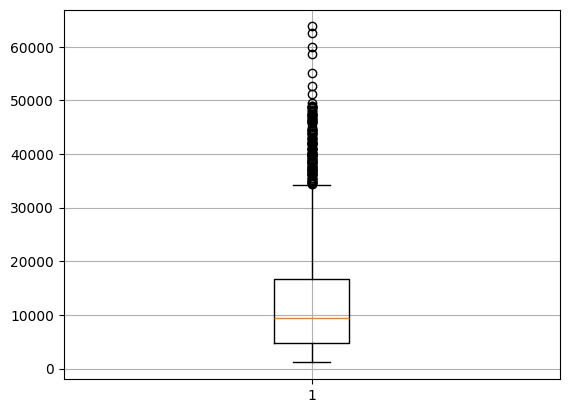

In [69]:
plt.boxplot(df.charges);

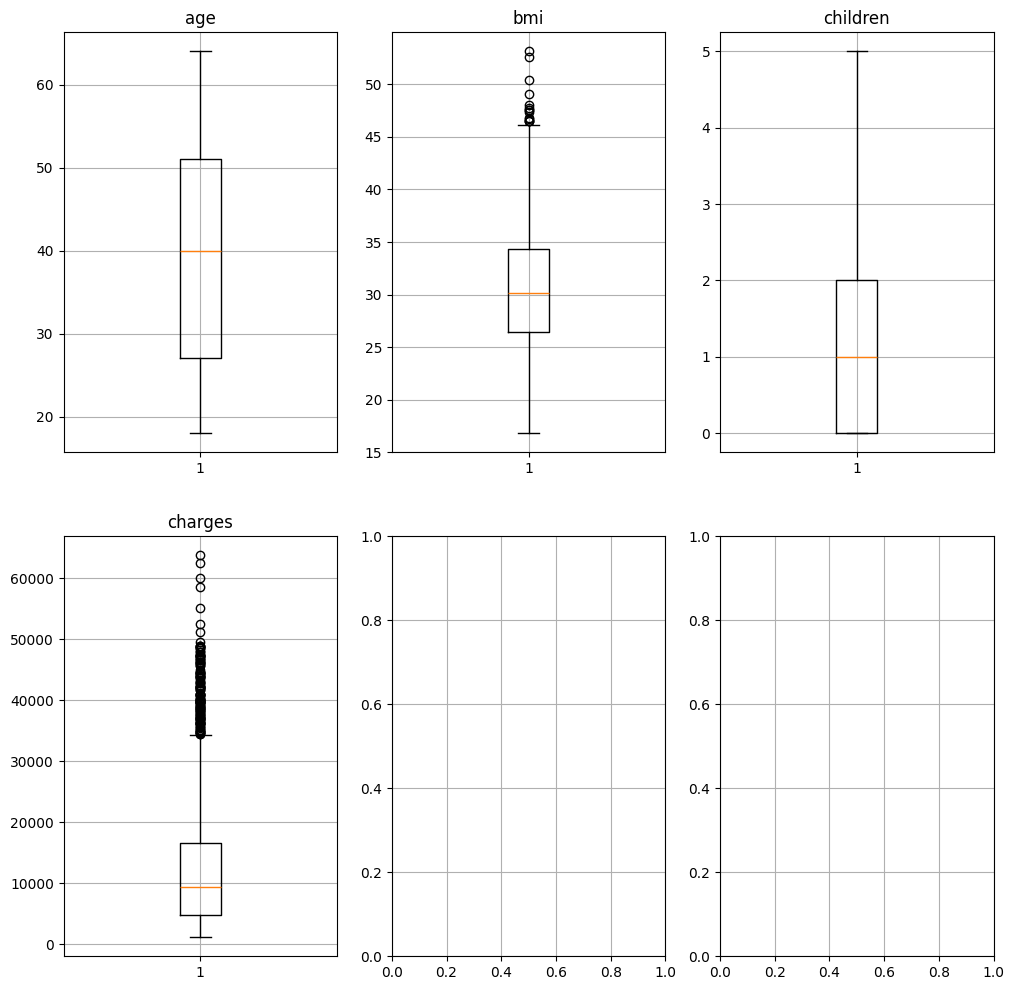

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('float64')):
        ax = axes_flat[i]
        ax.boxplot(df[col])
        ax.set_title(col)

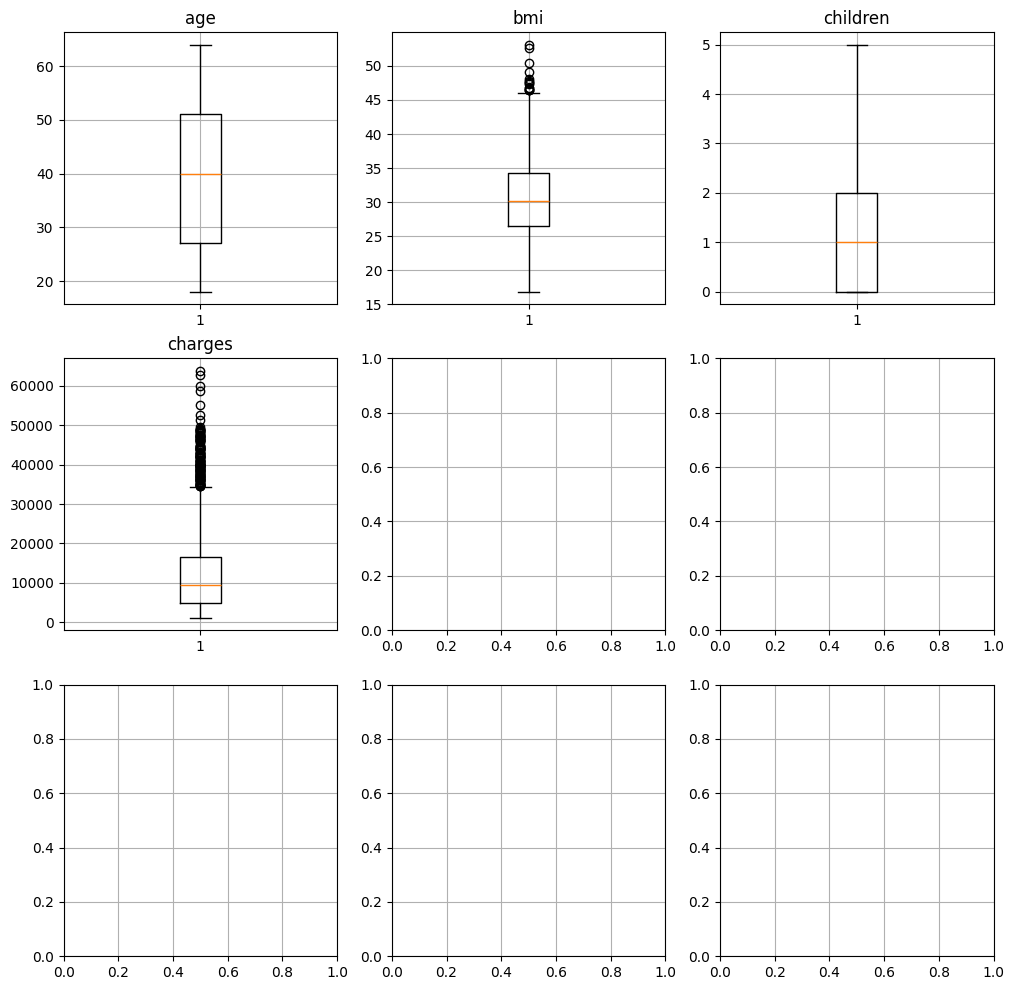

In [71]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('float64')):
        ax = axes_flat[i]
        ax.boxplot(dfe[col])
        ax.set_title(col)

### Two Varaibles Analysis

#### * Correlation

In [72]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.125517,0.051261,0.298536
bmi,0.125517,1.000000,0.007090,0.158379
children,0.051261,0.007090,1.000000,0.066010
charges,0.298536,0.158379,0.066010,1.000000


In [73]:
dfe.corr()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.125517,0.051261,-0.019283,-0.023052,0.005718,-0.013657,0.010739,-0.003022,0.298536
bmi,0.125517,1.000000,0.007090,0.045233,-0.010906,-0.120484,-0.139734,0.265563,-0.012764,0.158379
children,0.051261,0.007090,1.000000,0.019386,0.005309,-0.004951,0.022062,-0.022347,0.005750,0.066010
sex_male,-0.019283,0.045233,0.019386,1.000000,0.076340,-0.005134,-0.010490,0.018578,-0.003449,0.057362
smoker_yes,-0.023052,-0.010906,0.005309,0.076340,1.000000,0.000427,-0.036388,0.070615,-0.036388,0.786695
region_northeast,0.005718,-0.120484,-0.004951,-0.005134,0.000427,1.000000,-0.322612,-0.339086,-0.322612,0.004355
region_northwest,-0.013657,-0.139734,0.022062,-0.010490,-0.036388,-0.322612,1.000000,-0.344004,-0.327291,-0.043441
region_southeast,0.010739,0.265563,-0.022347,0.018578,0.070615,-0.339086,-0.344004,1.000000,-0.344004,0.083837
region_southwest,-0.003022,-0.012764,0.005750,-0.003449,-0.036388,-0.322612,-0.327291,-0.344004,1.000000,-0.046782
charges,0.298536,0.158379,0.066010,0.057362,0.786695,0.004355,-0.043441,0.083837,-0.046782,1.000000


<Axes: >

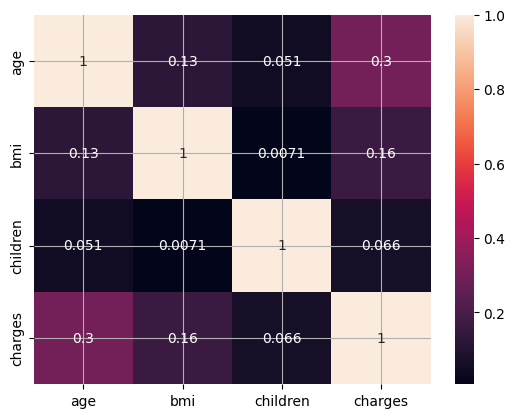

In [74]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

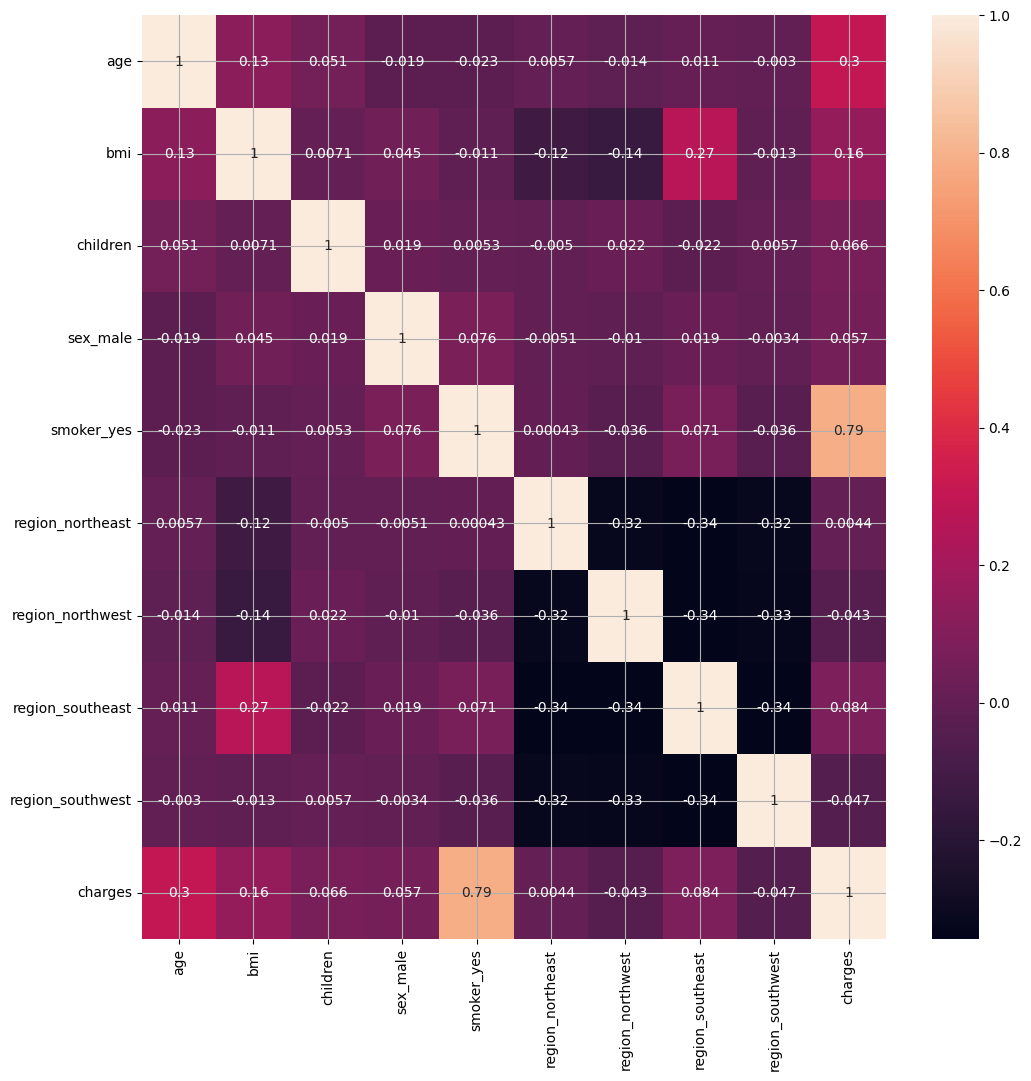

In [75]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfe.corr(),annot=True)

#### * Plots

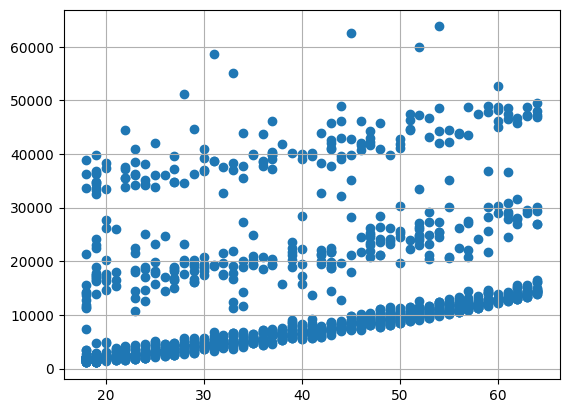

In [76]:
plt.scatter(df.age, df.charges)

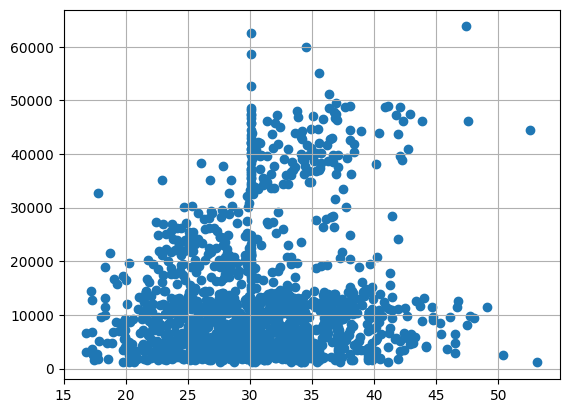

In [77]:
plt.scatter(df.bmi,df.charges)

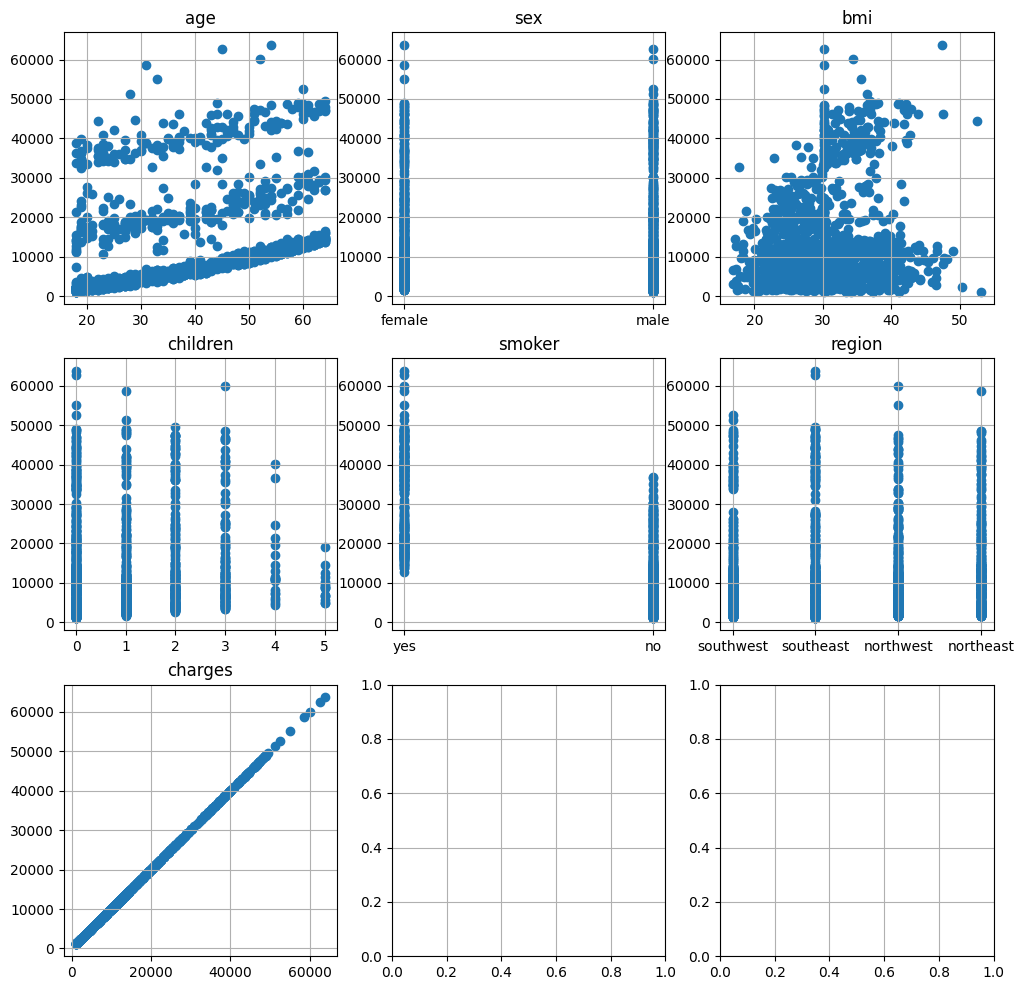

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.scatter(df[col], df.charges)
    ax.set_title(col)

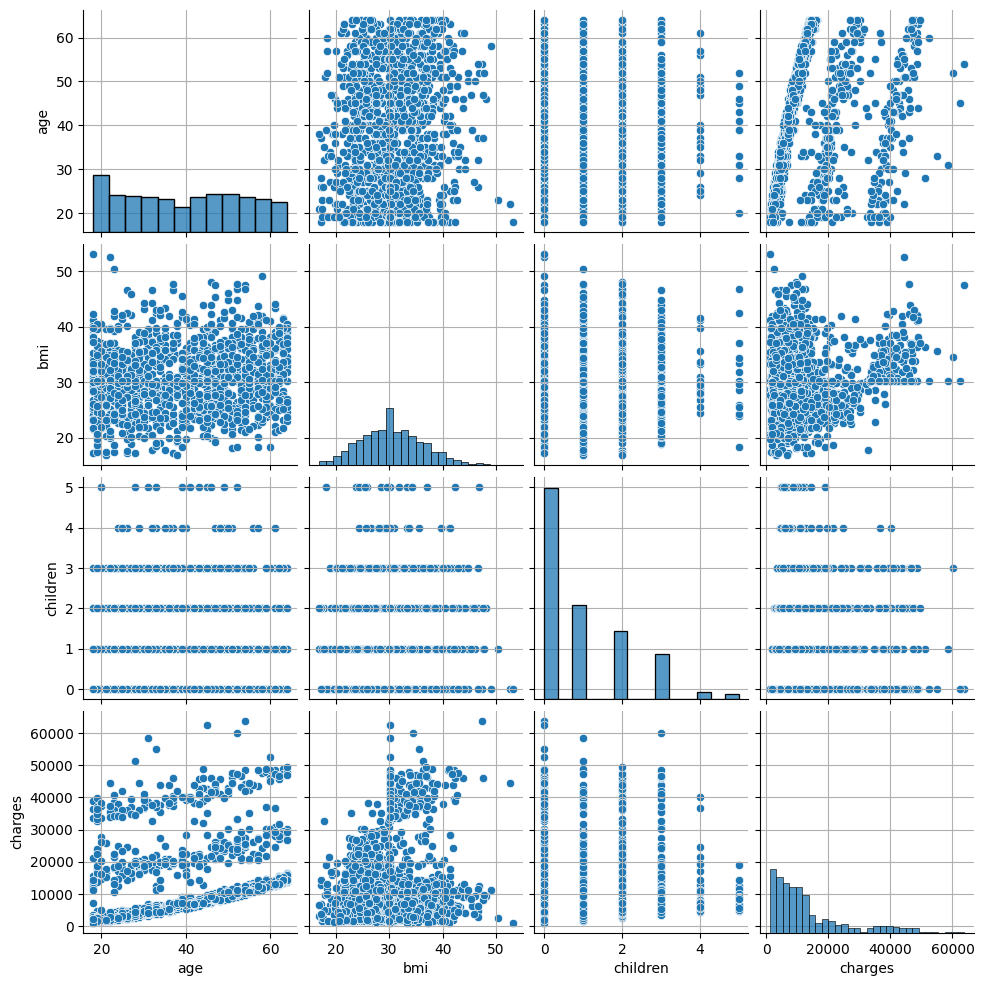

In [79]:
sns.pairplot(df)

In [80]:
pd.crosstab(index=df.sex,columns=df.smoker)

smoker,no,yes
sex,,
female,540,113
male,509,156


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\563843565.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.charges[df.sex=='male'], df.charges[df.sex=='female']], labels=['male', 'female'],vert=False)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1cad5bac3e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cad71ba900>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cad5f20b00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cad5f20ef0>}

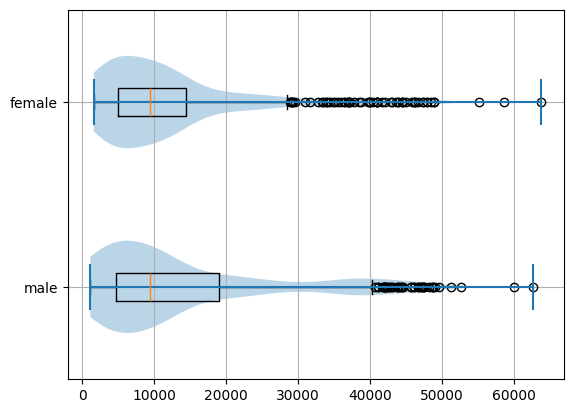

In [81]:
# boxplot & violin plot
# df.charges[df.sex=='male']
# plt.boxplot([df.charges[df.sex=='male'], df.charges[df.sex=='female']], labels=df.sex.unique())
# plt.boxplot([df.charges[df.sex=='male'], df.charges[df.sex=='female']], labels=['male', 'female'])
plt.boxplot([df.charges[df.sex=='male'], df.charges[df.sex=='female']], labels=['male', 'female'],vert=False)
plt.violinplot([df.charges[df.sex=='male'], df.charges[df.sex=='female']], vert=False)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\2197392653.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.charges[df[col]==var] for var in df[col].unique()], labels=df[col].unique(),vert=False)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1cad5f478f0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cad5f45010>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cad5fbcb00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cad4875700>}

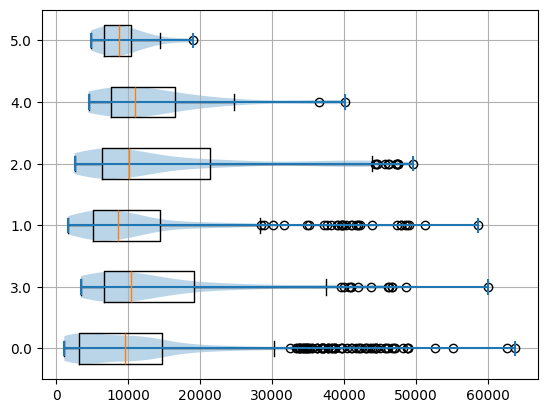

In [82]:
col="children"
plt.boxplot([df.charges[df[col]==var] for var in df[col].unique()], labels=df[col].unique(),vert=False)
plt.violinplot([df.charges[df[col]==var] for var in df[col].unique()],vert=False)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\3354591572.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.charges[df[col]==var] for var in df[col].unique()], labels=df[col].unique(),vert=False)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1cad600e180>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cad6024290>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cad5f89bb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cad79586b0>}

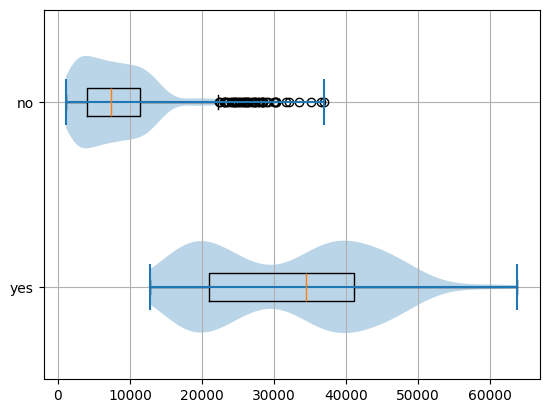

In [83]:
col="smoker"
plt.boxplot([df.charges[df[col]==var] for var in df[col].unique()], labels=df[col].unique(),vert=False)
plt.violinplot([df.charges[df[col]==var] for var in df[col].unique()],vert=False)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\3450023805.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False, labels=df[col].unique())
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\3450023805.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False, labels=df[col].unique())
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\3450023805.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df.charges[df[col] == var] for var in df[col].unique()], vert=

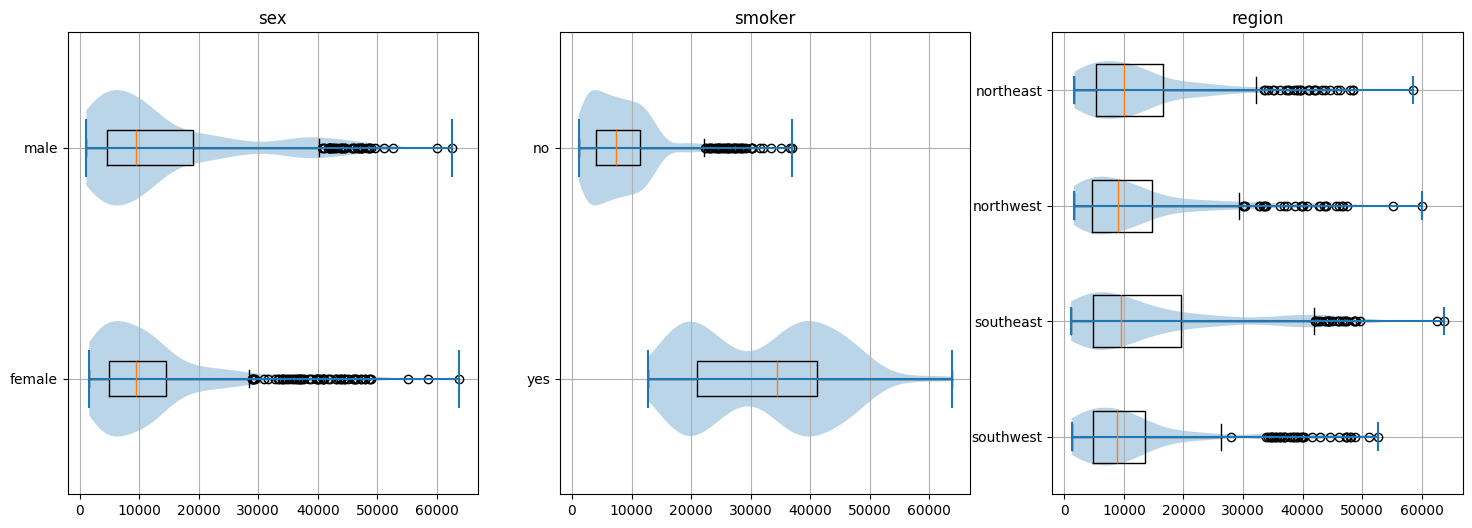

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('category')):
    ax = axes_flat[i]
    ax.boxplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False, labels=df[col].unique())
    ax.violinplot([df.charges[df[col] == var] for var in df[col].unique()], vert=False)
    ax.set_title(col)

### Multi Varaibles Analysis

#### * Smoker, BMI, Charges

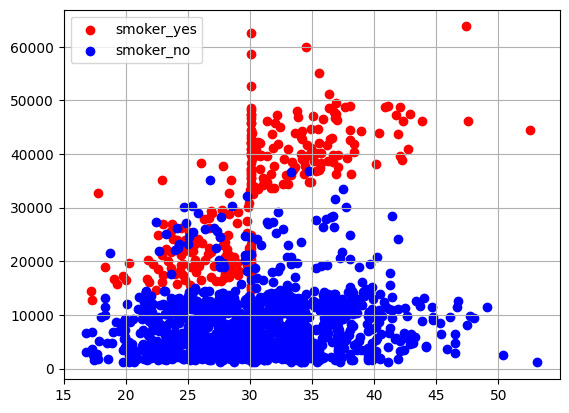

In [85]:
flags = df.smoker == 'yes'
plt.scatter(df.bmi[flags], df.charges[flags], c='r', label='smoker_yes')
plt.scatter(df.bmi[~flags], df.charges[~flags], c='b', label='smoker_no')
plt.legend()

#### * Smoker, Age, Charges

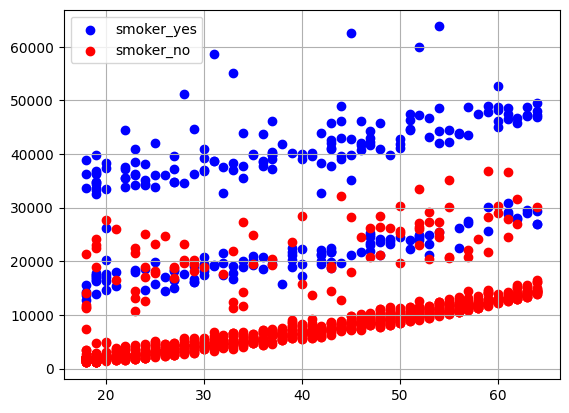

In [86]:
flags = df.smoker == 'yes'
plt.scatter(df.age[flags], df.charges[flags], c='b', label='smoker_yes')
plt.scatter(df.age[~flags], df.charges[~flags], c='r', label='smoker_no')
plt.legend()

In [87]:
#### * Smoker, BMI, Age, Charges

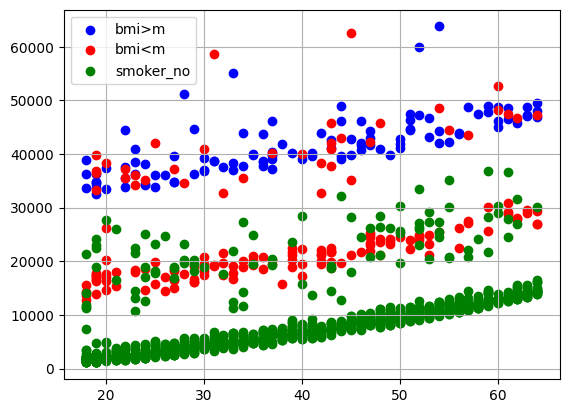

In [88]:
flags1 = df.smoker == 'yes'
flags2 = df.bmi > df.bmi.median()
plt.scatter(df.age[flags1 & flags2], df.charges[flags1 & flags2], c='b', label='bmi>m')
plt.scatter(df.age[flags1 & ~flags2], df.charges[flags1 & ~flags2], c='r', label='bmi<m')
plt.scatter(df.age[~flags1], df.charges[~flags1], c='g', label='smoker_no')
plt.legend()

## **🔸 Outliers**

### Univariate analysis

#### * Numerical features

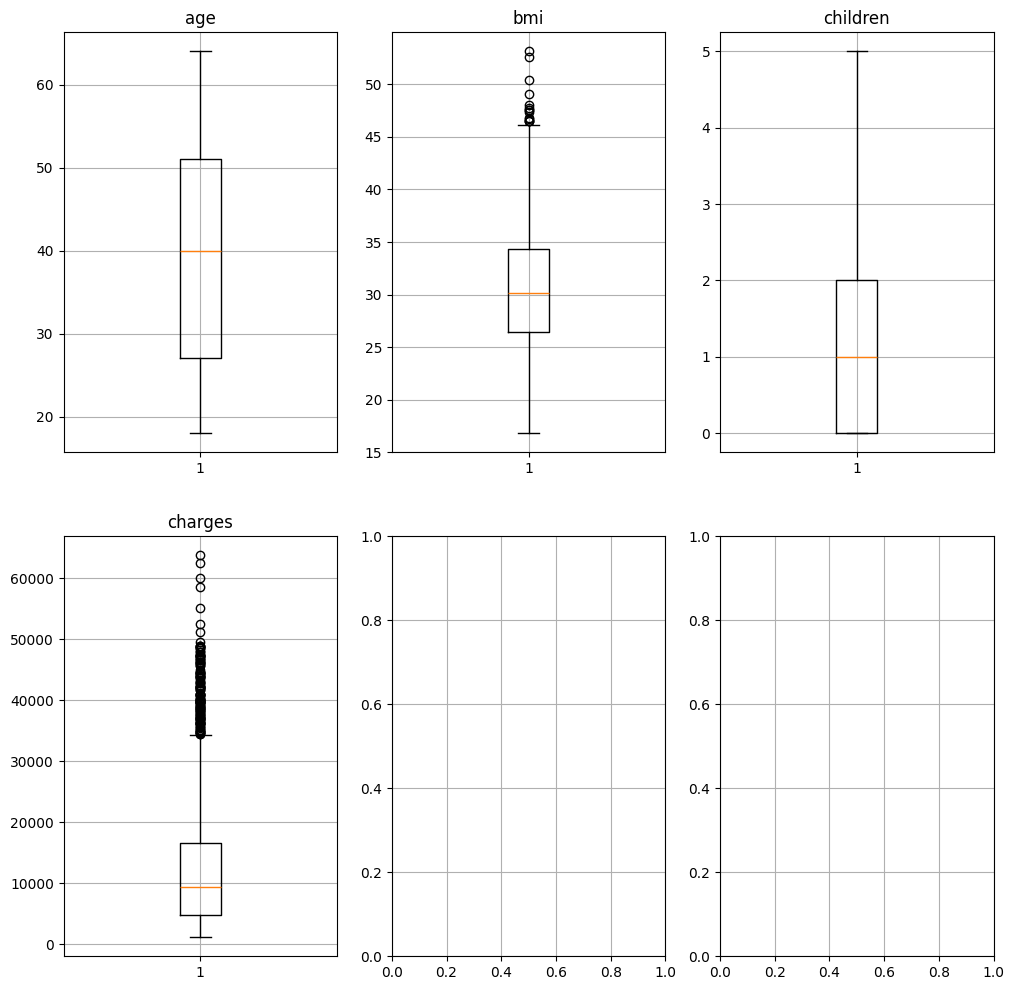

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('float64')):
        ax = axes_flat[i]
        ax.boxplot(df[col])
        ax.set_title(col)

In [90]:
df.describe()

,age,bmi,children,charges
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,39.528832,30.589632,0.972686,13335.884744
std,13.909197,5.922928,1.187449,12098.305244
min,18.000000,16.815000,0.000000,1131.506600
25%,27.000000,26.410000,0.000000,4828.586213
50%,40.000000,30.110000,1.000000,9423.922650
75%,51.000000,34.298750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


26.41 34.29875 7.888749999999998 14.576875000000003 46.131874999999994


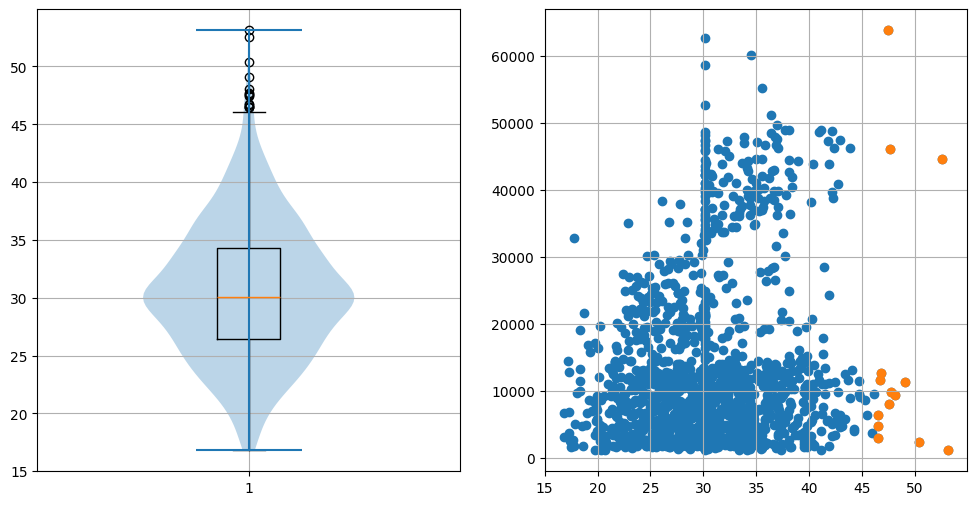

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].boxplot(df.bmi);
axes[0].violinplot(df.bmi)

axes[1].scatter(df.bmi, df.charges)

desc = df.describe()
Q1 = desc.loc['25%', 'bmi']
Q3 = desc.loc['75%', 'bmi']
IQR = Q3 - Q1
lower_cap = Q1 - 1.5*IQR
upper_cap = Q3 + 1.5*IQR
print(Q1, Q3, IQR, lower_cap, upper_cap)

flags = (df.bmi < lower_cap) | (df.bmi > upper_cap)
axes[1].scatter(df.bmi[flags], df.charges[flags])

#### * handling outliers

In [92]:
df.bmi[flags] = upper_cap

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\1242968245.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.bmi[flags] = upper_cap
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_13144\1242968245.py:1: SettingWithCopyWarning: 
A value is

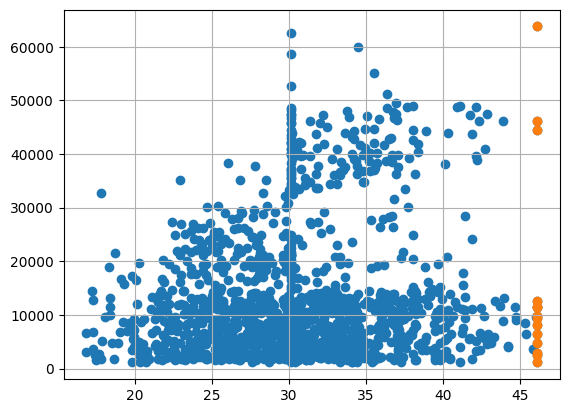

In [93]:
plt.scatter(df.bmi, df.charges)
plt.scatter(df.bmi[flags], df.charges[flags])

#### * Categorical features

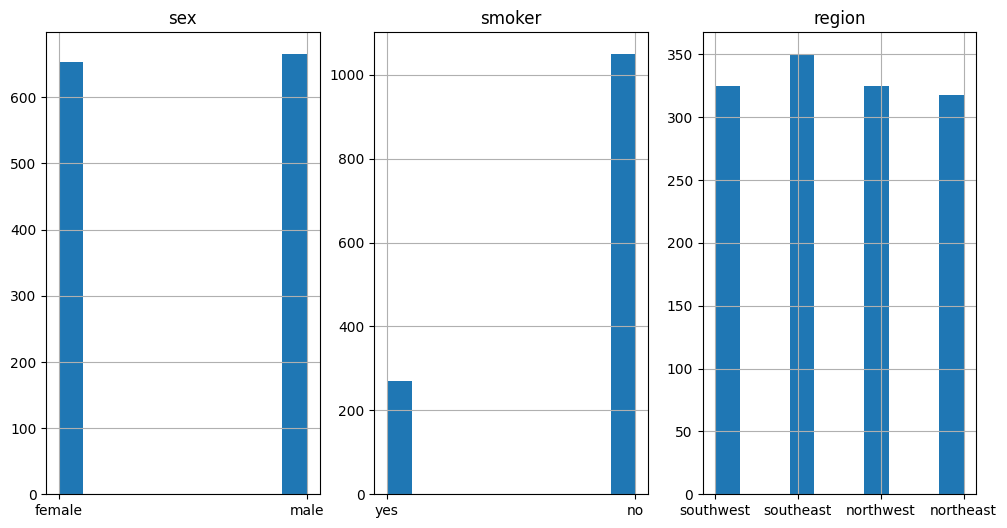

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes_flat = axes.flatten()

for i, col in enumerate(df.select_dtypes('category')):
        ax = axes_flat[i]
        ax.hist(df[col])
        ax.set_title(col)

In [95]:
df.children.value_counts()

children
0.0    648
1.0    287
2.0    208
3.0    137
4.0     22
5.0     16
Name: count, dtype: int64

### Bivariate analysis

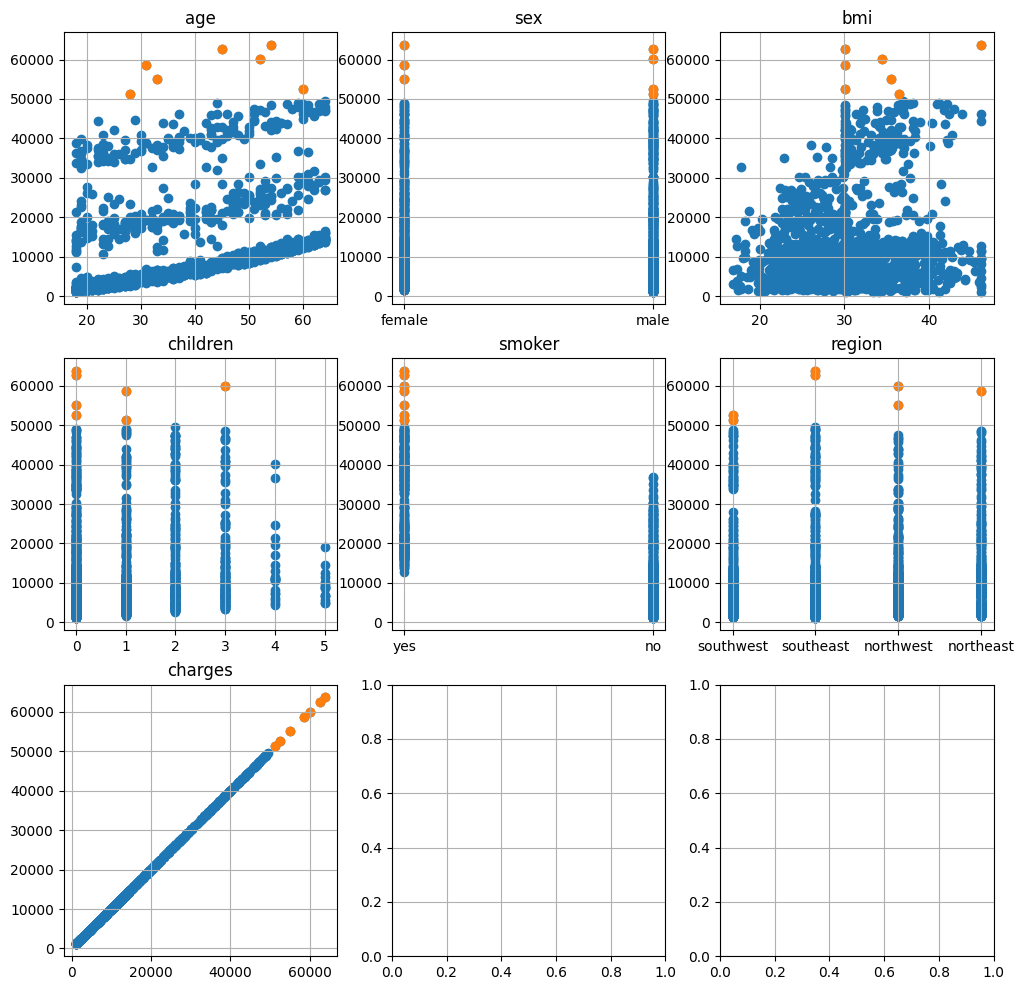

In [96]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.scatter(df[col], df.charges)
    flags = df.charges >= 50000
    ax.scatter(df[col][flags], df.charges[flags])
    ax.set_title(col)


#### * handling outliers

In [97]:
df[flags].index

Index([34, 543, 577, 819, 1146, 1230, 1300], dtype='int64')

In [98]:
df.drop(df[flags].index, inplace=True)

In [99]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52.0,female,44.700,3.0,no,southwest,11411.68500
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


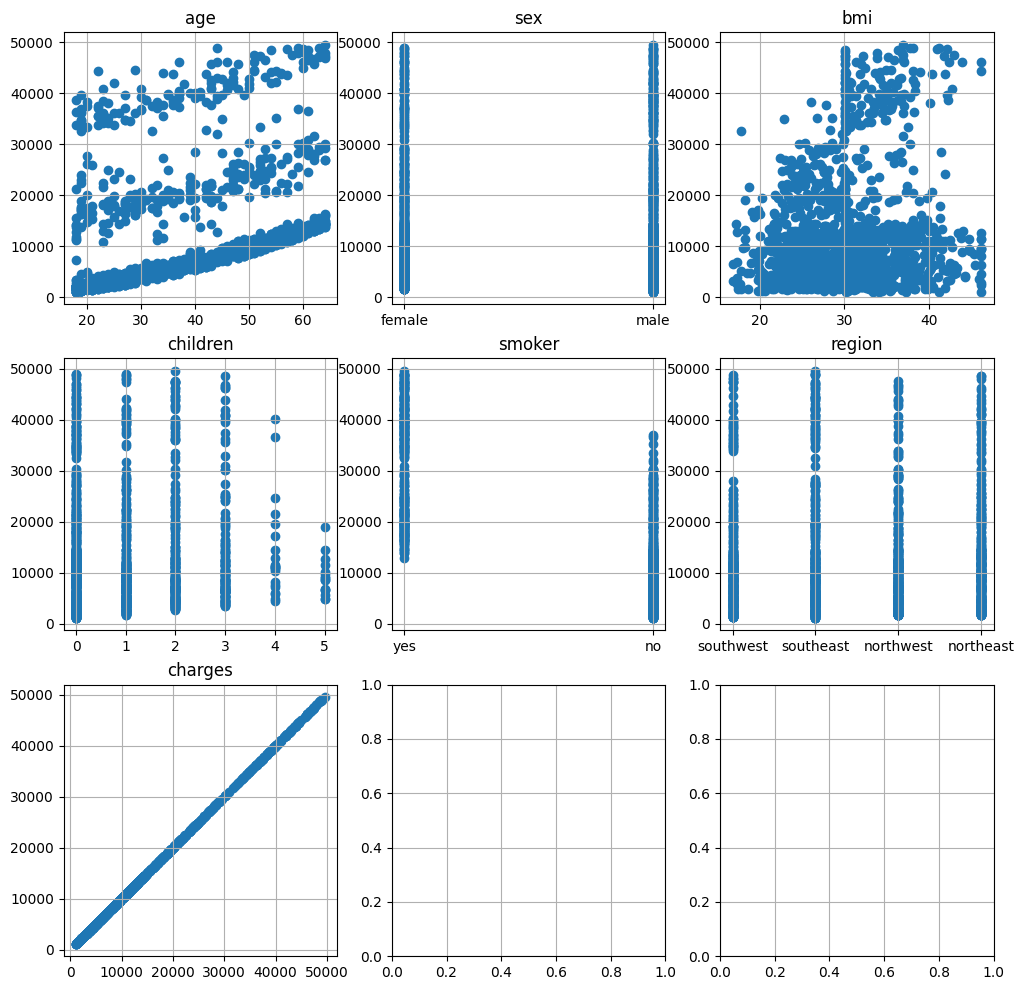

In [100]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]
    ax.scatter(df[col], df.charges)
    flags = df.charges >= 50000
    ax.scatter(df[col][flags], df.charges[flags])
    ax.set_title(col)


## **🔸 Data Normalization**

### Normalization

In [101]:
def normalization(x):
    return (x - x.min()) / (x.max() - x.min())

In [102]:
dfe = dfe.apply(normalization)
dfe.min(), dfe.max()

(age                 0.0
 bmi                 0.0
 children            0.0
 sex_male            0.0
 smoker_yes          0.0
 region_northeast    0.0
 region_northwest    0.0
 region_southeast    0.0
 region_southwest    0.0
 charges             0.0
 dtype: float64,
 age                 1.0
 bmi                 1.0
 children            1.0
 sex_male            1.0
 smoker_yes          1.0
 region_northeast    1.0
 region_northwest    1.0
 region_southeast    1.0
 region_southwest    1.0
 charges             1.0
 dtype: float64)

In [103]:
df.min(numeric_only=True)

age           18.0000
bmi           16.8150
children       0.0000
charges     1131.5066
dtype: float64

In [104]:
normz = MinMaxScaler()
normz.fit_transform(dfe)

array([[0.02173913, 0.30524577, 0.        , ..., 0.        , 1.        ,
        0.25149567],
       [0.2173913 , 0.4456836 , 0.6       , ..., 1.        , 0.        ,
        0.05296955],
       [0.32608696, 0.16219193, 0.        , ..., 0.        , 0.        ,
        0.33290746],
       ...,
       [0.        , 0.41594382, 0.        , ..., 0.        , 0.        ,
        0.01715346],
       [0.06521739, 0.24741842, 0.        , ..., 0.        , 1.        ,
        0.01399191],
       [0.93478261, 0.33746386, 0.        , ..., 0.        , 0.        ,
        0.44716373]])

### Standardization

In [105]:
def standardization(x):
    return (x - x.mean()) / x.std()

In [106]:
dfe.apply(standardization)
dfe

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.021739,0.305246,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.251496
2,0.217391,0.445684,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.052970
3,0.326087,0.162192,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.332907
4,0.304348,0.332232,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.043669
5,0.282609,0.245766,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.041909
...,...,...,...,...,...,...,...,...,...,...
1332,0.739130,0.767865,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.164118
1333,0.695652,0.389784,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.151169
1334,0.000000,0.415944,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.017153
1336,0.065217,0.247418,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.013992


In [107]:
dfe[['age', 'bmi', 'children', 'charges']] = dfe[['age', 'bmi', 'children', 'charges']].apply(standardization)
dfe

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.475918,-0.454105,-0.819139,0.0,1.0,0.0,0.0,0.0,1.0,0.293350
2,-0.828864,0.406955,1.707285,1.0,0.0,0.0,0.0,1.0,0.0,-0.734518
3,-0.469390,-1.331205,-0.819139,1.0,0.0,0.0,1.0,0.0,0.0,0.714859
4,-0.541284,-0.288646,-0.819139,1.0,0.0,0.0,1.0,0.0,0.0,-0.782674
5,-0.613179,-0.818790,-0.819139,0.0,0.0,0.0,0.0,1.0,0.0,-0.791786
...,...,...,...,...,...,...,...,...,...,...
1332,0.896613,2.382330,1.707285,0.0,0.0,0.0,0.0,0.0,1.0,-0.159047
1333,0.752823,0.064220,1.707285,1.0,0.0,0.0,1.0,0.0,0.0,-0.226093
1334,-1.547813,0.224613,-0.819139,0.0,0.0,1.0,0.0,0.0,0.0,-0.919956
1336,-1.332128,-0.808659,-0.819139,0.0,0.0,0.0,0.0,0.0,1.0,-0.936325


In [108]:
standard = StandardScaler()
standard.fit_transform(dfe)

array([[-1.47647804, -0.45427747, -0.81944992, ..., -0.60130712,
         1.74796585,  0.29346147],
       [-0.82917855,  0.40710991,  1.70793306, ...,  1.66304368,
        -0.57209356, -0.73479679],
       [-0.46956771, -1.3317103 , -0.81944992, ..., -0.60130712,
        -0.57209356,  0.71513063],
       ...,
       [-1.54840021,  0.22469847, -0.81944992, ..., -0.60130712,
        -0.57209356, -0.92030482],
       [-1.33263371, -0.80896639, -0.81944992, ..., -0.60130712,
         1.74796585, -0.93667992],
       [ 1.54425295, -0.25666507, -0.81944992, ..., -0.60130712,
        -0.57209356,  1.30691652]])

In [109]:
dataset = dfe.values
dataset

array([[-1.47591782, -0.4541051 , -0.81913899, ...,  0.        ,
         1.        ,  0.29335012],
       [-0.82886393,  0.40695544,  1.70728501, ...,  1.        ,
         0.        , -0.73451798],
       [-0.46938954, -1.331205  , -0.81913899, ...,  0.        ,
         0.        ,  0.71485929],
       ...,
       [-1.54781269,  0.22461321, -0.81913899, ...,  0.        ,
         0.        , -0.91995562],
       [-1.33212806, -0.80865944, -0.81913899, ...,  0.        ,
         1.        , -0.93632451],
       [ 1.54366701, -0.25656768, -0.81913899, ...,  0.        ,
         0.        ,  1.30642063]])

## **🔸 Data/Feature Reduction**

### Data Reduction

In [116]:
idx = np.random.permutation(dfe.shape[0])
idx.shape

(1318,)

In [111]:
idx = np.random.permutation(dfe.shape[0])[:1000]
idx.shape

(1000,)

In [112]:
dfe.iloc[idx]

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
642,1.543667,0.561440,-0.819139,1.0,0.0,1.0,0.0,0.0,0.0,-0.015872
909,-0.541284,-1.011262,-0.819139,0.0,1.0,0.0,0.0,0.0,1.0,0.343885
501,0.249559,-0.769827,-0.819139,1.0,0.0,1.0,0.0,0.0,0.0,-0.537143
540,-0.397495,1.251132,1.707285,0.0,0.0,0.0,0.0,0.0,1.0,-0.590119
318,0.321454,-0.497158,-0.819139,0.0,0.0,0.0,1.0,0.0,0.0,-0.488886
...,...,...,...,...,...,...,...,...,...,...
73,1.327982,0.239808,0.023002,1.0,0.0,0.0,0.0,1.0,0.0,-0.114831
401,0.537139,2.858445,0.023002,1.0,0.0,0.0,0.0,1.0,0.0,-0.434107
677,1.471772,0.128377,1.707285,1.0,1.0,0.0,1.0,0.0,0.0,2.710681
728,-1.547813,1.636077,-0.819139,0.0,0.0,1.0,0.0,0.0,0.0,-0.918995


### Feature Selection

In [113]:
dfe.corr()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.125517,0.051261,-0.019283,-0.023052,0.005718,-0.013657,0.010739,-0.003022,0.298536
bmi,0.125517,1.000000,0.007090,0.045233,-0.010906,-0.120484,-0.139734,0.265563,-0.012764,0.158379
children,0.051261,0.007090,1.000000,0.019386,0.005309,-0.004951,0.022062,-0.022347,0.005750,0.066010
sex_male,-0.019283,0.045233,0.019386,1.000000,0.076340,-0.005134,-0.010490,0.018578,-0.003449,0.057362
smoker_yes,-0.023052,-0.010906,0.005309,0.076340,1.000000,0.000427,-0.036388,0.070615,-0.036388,0.786695
region_northeast,0.005718,-0.120484,-0.004951,-0.005134,0.000427,1.000000,-0.322612,-0.339086,-0.322612,0.004355
region_northwest,-0.013657,-0.139734,0.022062,-0.010490,-0.036388,-0.322612,1.000000,-0.344004,-0.327291,-0.043441
region_southeast,0.010739,0.265563,-0.022347,0.018578,0.070615,-0.339086,-0.344004,1.000000,-0.344004,0.083837
region_southwest,-0.003022,-0.012764,0.005750,-0.003449,-0.036388,-0.322612,-0.327291,-0.344004,1.000000,-0.046782
charges,0.298536,0.158379,0.066010,0.057362,0.786695,0.004355,-0.043441,0.083837,-0.046782,1.000000


In [114]:
dfe.drop(['sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'children'], axis=1, inplace=True)

In [115]:
dfe


,age,bmi,smoker_yes,charges
0,-1.475918,-0.454105,1.0,0.293350
2,-0.828864,0.406955,0.0,-0.734518
3,-0.469390,-1.331205,0.0,0.714859
4,-0.541284,-0.288646,0.0,-0.782674
5,-0.613179,-0.818790,0.0,-0.791786
...,...,...,...,...
1332,0.896613,2.382330,0.0,-0.159047
1333,0.752823,0.064220,0.0,-0.226093
1334,-1.547813,0.224613,0.0,-0.919956
1336,-1.332128,-0.808659,0.0,-0.936325


In [117]:
dfe.corr()

,age,bmi,smoker_yes,charges
age,1.000000,0.125517,-0.023052,0.298536
bmi,0.125517,1.000000,-0.010906,0.158379
smoker_yes,-0.023052,-0.010906,1.000000,0.786695
charges,0.298536,0.158379,0.786695,1.000000
